# Overview
This notebook contains the code to plot the main figures. Some figures are analitycal, others data plots. Further manipultation to join plot was made using Inkskape.

## Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
import math
from scipy.signal import hilbert, chirp
from google.colab import files
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from matplotlib import cm

## Homemade auxiliary functions

### Função Itens-Quantidades

In [2]:
def quant_itens(raster_time, raster_who,T1,T2, modulo):

  if (modulo == 1): r1,r2,r3,r4,r5 = 1,25,50,75,100
  if (modulo == 2): r1,r2,r3,r4,r5 = 101,125,150,175,200
  if (modulo == 3): r1,r2,r3,r4,r5 = 201,225,250,275,300
  if (modulo == 4): r1,r2,r3,r4,r5 = 301,325,350,375,400

  item_A_t = []
  item_A_quantidade = []

  item_B_t = []
  item_B_quantidade = []

  item_C_t = []
  item_C_quantidade = []

  item_D_t = []
  item_D_quantidade = []


  tt1 = T1
  tt2 = T2


  for j in range(len(raster_time)):
      if((raster_who[j] > r1) & (raster_who[j] < r2)):          #item A
          if((raster_time[j]>tt1) & (raster_time[j]< tt2)):
              if(len(item_A_t)==0):
                item_A_t.append(raster_time[j])
                item_A_quantidade.append(0)
              item_A_t.append(raster_time[j])
              item_A_quantidade.append(len(item_A_t)-1)

      elif((raster_who[j] > r2) & (raster_who[j] < r3)):      #item B
          if((raster_time[j]>tt1) & (raster_time[j]< tt2)):
              if(len(item_B_t)==0):
                item_B_t.append(raster_time[j])
                item_B_quantidade.append(0)
              item_B_t.append(raster_time[j])
              item_B_quantidade.append(len(item_B_t)-1)


      elif((raster_who[j] > r3) & (raster_who[j] < r4)):      #item C
          if((raster_time[j]>tt1) & (raster_time[j]< tt2)):
              if(len(item_C_t)==0):
                item_C_t.append(raster_time[j])
                item_C_quantidade.append(0)
              item_C_t.append(raster_time[j])
              item_C_quantidade.append(len(item_C_t)-1)

      elif((raster_who[j] > r4) & (raster_who[j] < r5)):      #item D
        if((raster_time[j]>tt1) & (raster_time[j]< tt2)):
            if(len(item_D_t)==0):
              item_D_t.append(raster_time[j])
              item_D_quantidade.append(0)
            item_D_t.append(raster_time[j])
            item_D_quantidade.append(len(item_D_t)-1)



  if(len(item_A_t)!= 0):item_A_quantidade.append(0)
  if(len(item_B_t)!= 0):item_B_quantidade.append(0)
  if(len(item_C_t)!= 0):item_C_quantidade.append(0)
  if(len(item_D_t)!= 0):item_D_quantidade.append(0)



  if(len(item_A_t)!= 0):item_A_t.append(item_A_t[-1])
  if(len(item_B_t)!= 0):item_B_t.append(item_B_t[-1])
  if(len(item_C_t)!= 0):item_C_t.append(item_C_t[-1])
  if(len(item_D_t)!= 0):item_D_t.append(item_D_t[-1])

  return item_A_t,\
        item_B_t,\
        item_C_t,\
        item_D_t,\
        item_A_quantidade,\
        item_B_quantidade,\
        item_C_quantidade,\
        item_D_quantidade



### Função Background

In [3]:
def backgroud_1():

  ax1[0].axhline(125, c = 'k',alpha= 0.9, ls = '-', lw = 2)
  ax1[0].axhline(250, c = 'k', alpha= 0.9,ls = '-', lw = 2)
  ax1[0].axhline(375, c = 'k',alpha= 0.9, ls = '-', lw = 2)
  ax1[0].axhline(500, c = 'k',alpha= 0.9, ls = '-', lw = 2)

  ax1[1].axhline(100, c = 'k',alpha= 0.9, ls = '-', lw = 2)
  ax1[1].axhline(200, c = 'k', alpha= 0.9,ls = '-', lw = 2)
  ax1[1].axhline(300, c = 'k',alpha= 0.9, ls = '-', lw = 2)
  ax1[1].axhline(400, c = 'k',alpha= 0.9, ls = '-', lw = 2)

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.9, pad = 0.1)
  item_division = 25/700
  plus = 50/650 + 100/650 - 0.1
  plus = 100/700
  ax1[0].axvspan(270, 1000,0+plus,item_division+plus, color='r', alpha=0.3, lw=1)
  ax1[0].axvspan(270, 1000,item_division+plus,2*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,2*item_division+plus,3*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[0].axvspan(270, 1000,2*item_division+plus,4*item_division+plus, color='r', alpha=0.07, lw=1)

  ax1[0].axvspan(M1_c1[0], M1_c1[1],0+plus,5*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M2_c1[0], M2_c1[1],5*item_division+plus,10*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M3_c1[0], M3_c1[1],10*item_division+plus,15*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M4_c1[0], M4_c1[1],15*item_division+plus,20*item_division+plus, color='gray', alpha=0.3, lw=1)

  ax1[0].axvspan(M1_c2[0], M1_c2[1],0+plus,5*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M2_c2[0], M2_c2[1],5*item_division+plus,10*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M3_c2[0], M3_c2[1],10*item_division+plus,15*item_division+plus, color='gray', alpha=0.3, lw=1)
  ax1[0].axvspan(M4_c2[0], M4_c2[1],15*item_division+plus,20*item_division+plus, color='gray', alpha=0.3, lw=1)


  ax1[0].axvspan(270, 1000,item_division*5+plus,item_division*6+plus, color='r', alpha=0.3, lw=1)
  ax1[0].axvspan(270, 1000,item_division*6+plus,7*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,7*item_division+plus,8*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[0].axvspan(270, 1000,8*item_division+plus,9*item_division+plus, color='r', alpha=0.07, lw=1)


  ax1[0].axvspan(270, 1000,item_division*10+plus,item_division*11+plus, color='r', alpha=0.3, lw=1)
  ax1[0].axvspan(270, 1000,item_division*11+plus,12*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,12*item_division+plus,13*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[0].axvspan(270, 1000,13*item_division+plus,14*item_division+plus, color='r', alpha=0.07, lw=1)



  ax1[0].axvspan(270, 1000,item_division*15+plus,item_division*16+plus, color='r', alpha=0.3, lw=1)
  ax1[0].axvspan(270, 1000,item_division*16+plus,17*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,17*item_division+plus,18*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[0].axvspan(270, 1000,18*item_division+plus,19*item_division+plus, color='r', alpha=0.07, lw=1)


  ###inibition

  plusp = 50/650 + 100/650 + 16*item_division
  ax1[0].axvspan(270, 1000,item_division*4+plus,item_division*5+plus, color='b', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,item_division*9+plus,item_division*10+plus, color='b', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,item_division*14+plus,item_division*15+plus, color='b', alpha=0.2, lw=1)
  ax1[0].axvspan(270, 1000,item_division*19+plus,item_division*20+plus, color='b', alpha=0.2, lw=1)




###

  ax1[1].axvspan(380, 1000,0+plus,item_division+plus, color='r', alpha=0.3, lw=1)
  ax1[1].axvspan(380, 1000,item_division+plus,2*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[1].axvspan(380, 1000,2*item_division+plus,3*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[1].axvspan(380, 1000,2*item_division+plus,4*item_division+plus, color='r', alpha=0.07, lw=1)



  ax1[1].axvspan(380, 1000,item_division*4+plus,item_division*5+plus, color='r', alpha=0.3, lw=1)
  ax1[1].axvspan(380, 1000,item_division*5+plus,6*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[1].axvspan(380, 1000,6*item_division+plus,7*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[1].axvspan(380, 1000,7*item_division+plus,8*item_division+plus, color='r', alpha=0.07, lw=1)


  ax1[1].axvspan(380, 1000,item_division*8+plus,item_division*9+plus, color='r', alpha=0.3, lw=1)
  ax1[1].axvspan(380, 1000,item_division*9+plus,10*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[1].axvspan(380, 1000,10*item_division+plus,11*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[1].axvspan(380, 1000,11*item_division+plus,12*item_division+plus, color='r', alpha=0.07, lw=1)



  ax1[1].axvspan(380, 1000,item_division*12+plus,item_division*13+plus, color='r', alpha=0.3, lw=1)
  ax1[1].axvspan(380, 1000,item_division*13+plus,14*item_division+plus, color='r', alpha=0.2, lw=1)
  ax1[1].axvspan(380, 1000,14*item_division+plus,15*item_division+plus, color='r', alpha=0.1, lw=1)
  ax1[1].axvspan(380, 1000,15*item_division+plus,16*item_division+plus, color='r', alpha=0.07, lw=1)


  ###inibition

  plusp = 50/650 + 100/650 + 16*item_division
  ax1[1].axvspan(380, 1000,0+plusp,item_division+plusp, color='b', alpha=0.3, lw=1)
  ax1[1].axvspan(380, 1000,item_division+plusp,2*item_division+plusp, color='b', alpha=0.2, lw=1)
  ax1[1].axvspan(380, 1000,2*item_division+plusp,3*item_division+plusp, color='b', alpha=0.1, lw=1)
  ax1[1].axvspan(380, 1000,2*item_division+plusp,4*item_division+plusp, color='b', alpha=0.07, lw=1)






### Função plot estimulos

In [4]:
def plot_estímulos(parameter):


  space = 0.001
  d = 100/650


  ax1[1].axvspan(275, 295, 3*(50/(550*4))- space, 4*(50/(550*4))- space, color='r', alpha=0.6, lw=3)
  ax1[1].axvspan(275+parameter/100, 295+parameter/100, 2*(50/(550*4))- space, 3*(50/(550*4))- space, color='purple', alpha=0.6, lw=3)
  ax1[1].axvspan(275+2*parameter/100, 295+2*parameter/100, 1*(50/(550*4))- space, 2*(50/(550*4))- space, color='b', alpha=0.6, lw=3)
  ax1[1].axvspan(275+3*parameter/100, 295+3*parameter/100, 0*(50/(550*4))- space, 1*(50/(550*4))- space, color='g', alpha=0.6, lw=3)
  ax1[1].axvspan(250, 550, 0, 4*(100/(650*4)), color='gray', alpha=0.2, lw=0)

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.9, pad = 0.1)
  ax1[0].text(275.5,6.5,'A', fontsize = 25, alpha= 0.7,bbox=props)
  ax1[0].text(275.5,6.5+25,'B', fontsize = 25, alpha= 0.7, bbox=props)
  ax1[0].text(275.5,6.5+50,'C', fontsize = 25, alpha= 0.7, bbox=props)
  ax1[0].text(275.5,6.5+75,'D', fontsize = 25, alpha= 0.7, bbox=props)

  ax1[0].text((295+275)/2-1,580,'A', fontsize = 25, alpha= 0.7)
  ax1[0].text(parameter/100+(295+275)/2+11,560,'B', fontsize = 25, alpha= 0.7)
  ax1[0].text(2*parameter/100+(295+275)/2+23,540,'C', fontsize = 25, alpha= 0.7)
  ax1[0].text(3*parameter/100+(295+275)/2+35,520,'D', fontsize = 25, alpha= 0.7)



Plot Modules

In [5]:
def plot_modulo(a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q,a2t,b2t,c2t,d2t,a2q,b2q,c2q,d2q,style):


  global c1_d1, c1_d2, c1_d3,c1_d1, c1_d2, c1_d3

  sty = style
  alfa = 0.8
  gross = 3



  ax2.plot(a1t,np.array(a1q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross,ls = sty, label = "principal stimuli (m1)")
  ax2.plot(b1t,np.array(b1q)*4*1.0-200, c = 'k',alpha= alfa, lw =gross,ls = sty, label = "principal stimuli (m1)")
  ax2.plot(c1t,np.array(c1q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross, ls = sty,label = "principal stimuli (m1)")
  ax2.plot(d1t,np.array(d1q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross, ls = sty,label = "principal stimuli (m1)")



  aa= 0.5
##
  if (len(a1q) !=0):
    y=[]
    for i in range(len(a1q)):
      y.append(-100)

    x = np.linspace(a1q[0],a1q[-1],len(a1q))
    ax2.fill_between(a1t, np.array(a1q)*4*1.0-200, -200,color = 'r', alpha= aa)
###

  if (len(b1q) !=0):
    y=[]
    for i in range(len(b1q)):
      y.append(-100)

    x = np.linspace(b1q[0],b1q[-1],len(b1q))
    ax2.fill_between(b1t, np.array(b1q)*4*1.0-200, -200,color = 'purple', alpha= aa)

  if (len(c1q) !=0):
    y=[]
    for i in range(len(c1q)):
      y.append(-100)

    x = np.linspace(c1q[0],c1q[-1],len(c1q))
    ax2.fill_between(c1t, np.array(c1q)*4*1.0-200, -200,color = 'b', alpha= aa)

  if (len(d1q) !=0):
    y=[]
    for i in range(len(d1q)):
      y.append(-100)

    x = np.linspace(d1q[0],d1q[-1],len(d1q))
    ax2.fill_between(d1t, np.array(d1q)*4*1.0-200, -200,color = 'g', alpha= aa)




  ax2.plot(a2t,np.array(a2q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross,ls = sty, label = "principal stimuli (m1)")
  ax2.plot(b2t,np.array(b2q)*4*1.0-200, c = 'k',alpha= alfa, lw =gross,ls = sty, label = "principal stimuli (m1)")
  ax2.plot(c2t,np.array(c2q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross, ls = sty,label = "principal stimuli (m1)")
  ax2.plot(d2t,np.array(d2q)*4*1.0-200, c = 'k',alpha= alfa, lw = gross, ls = sty,label = "principal stimuli (m1)")


  ##
  if (len(a2q) !=0):
    y=[]
    for i in range(len(a2q)):
      y.append(-100)

    x = np.linspace(a2q[0],a2q[-1],len(a2q))
    ax2.fill_between(a2t, np.array(a2q)*4*1.0-200, -200,color = 'r', alpha= aa)
###

  if (len(b2q) !=0):
    y=[]
    for i in range(len(b2q)):
      y.append(-100)

    x = np.linspace(b2q[0],b2q[-1],len(b2q))
    ax2.fill_between(b2t, np.array(b2q)*4*1.0-200, -200,color = 'purple', alpha= aa)

  if (len(c2q) !=0):
    y=[]
    for i in range(len(c2q)):
      y.append(-100)

    x = np.linspace(c2q[0],c2q[-1],len(c2q))
    ax2.fill_between(c2t, np.array(c2q)*4*1.0-200, -200,color = 'b', alpha= aa)

  if (len(d2q) !=0):
    y=[]
    for i in range(len(d2q)):
      y.append(-100)

    x = np.linspace(d2q[0],d2q[-1],len(d2q))
    ax2.fill_between(d2t, np.array(d2q)*4*1.0-200, -200,color = 'g', alpha= aa)



### Making Space

In [6]:
def making_1():
  global med_i1a,med_i1b,med_i1c, med_i1d
  global med_i2a,med_i2b,med_i2c, med_i2d
  global med_i3a,med_i3b,med_i3c, med_i3d
  global med_i4a,med_i4b,med_i4c, med_i4d

  med_i1a, med_i1b, med_i1c, med_i1d  = [],[],[],[]
  med_i2a, med_i2b, med_i2c, med_i2d  = [],[],[],[]
  med_i3a, med_i3b, med_i3c, med_i3d  = [],[],[],[]
  med_i4a, med_i4b, med_i4c, med_i4d  = [],[],[],[]

  global i1a_statis,i1b_statis,i1c_statis,i1d_statis
  global i2a_statis,i2b_statis,i2c_statis,i2d_statis
  global i3a_statis,i3b_statis,i3c_statis,i3d_statis
  global i4a_statis,i4b_statis,i4c_statis,i4d_statis

  i1a_statis,i1b_statis,i1c_statis,i1d_statis = [],[],[],[]
  i2a_statis,i2b_statis,i2c_statis,i2d_statis = [],[],[],[]
  i3a_statis,i3b_statis,i3c_statis,i3d_statis = [],[],[],[]
  i4a_statis,i4b_statis,i4c_statis,i4d_statis = [],[],[],[]

####
def making_2(med_i1a,med_i1b,med_i1c,med_i1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis):
    med_i1a.append(0)
    med_i1b.append(0)
    med_i1c.append(0)
    med_i1d.append(0)

    i1a_statis.append([])
    i1b_statis.append([])
    i1c_statis.append([])
    i1d_statis.append([])

def making_3():
    global item_1a,item_1b ,item_1c ,item_1d
    global item_2a,item_2b ,item_2c ,item_2d
    global item_3a,item_3b ,item_3c ,item_3d
    global item_4a,item_4b ,item_4c ,item_4d

    item_1a,item_1b ,item_1c ,item_1d  = [],[],[],[]
    item_2a,item_2b ,item_2c ,item_2d  = [],[],[],[]
    item_3a,item_3b ,item_3c ,item_3d  = [],[],[],[]
    item_4a,item_4b ,item_4c ,item_4d  = [],[],[],[]


def making_4(a1q,b1q,c1q,d1q,item_1a,item_1b,item_1c,item_1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis,i):
  if(len(a1q)<1): item_1a.append(0)
  else:           item_1a.append(a1q[-2])

  if(len(b1q)<1): item_1b.append(0)
  else:           item_1b.append(b1q[-2])

  if(len(c1q)<1): item_1c.append(0)
  else:           item_1c.append(c1q[-2])

  if(len(d1q)<1): item_1d.append(0)
  else:           item_1d.append(d1q[-2])

  i1a_statis[i].append(item_1a)
  i1b_statis[i].append(item_1b)
  i1c_statis[i].append(item_1c)
  i1d_statis[i].append(item_1d)

def making_5(med_i1a,med_i1b,med_i1c,med_i1d,item_1a,item_1b,item_1c,item_1d, parameter):
  for j in range(len(parameter)-1):
    med_i1a[j]+=item_1a[j]
    med_i1b[j]+=item_1b[j]
    med_i1c[j]+=item_1c[j]
    med_i1d[j]+=item_1d[j]

def making_6(med_i1a, med_i1b, med_i1c, med_i1d, parameter, nrep):

  for j in range(len(parameter)-1):
    med_i1a[j]= med_i1a[j]/nrep
    med_i1b[j]= med_i1b[j]/nrep
    med_i1c[j]= med_i1c[j]/nrep
    med_i1d[j]= med_i1d[j]/nrep




### Cycles

In [7]:
def ciclos(v_onda):
  global M1_c1,M2_c1,M3_c1,M4_c1
  global M1_c2,M2_c2,M3_c2,M4_c2
  global m1

  v = v_onda
  vi = 0.6
  t = np.linspace(0,500,5000)
  m1= np.sin(2*np.pi*8*t*0.001 - 0*v)
  m2= np.sin(2*np.pi*8*t*0.001 - 1*v)
  m3= np.sin(2*np.pi*8*t*0.001 - 2*v)
  m4= np.sin(2*np.pi*8*t*0.001 - 3*v)

  mm1 = (np.arcsin(0.9)+0*v+vi)/(2*np.pi*8*0.001)
  mm2 = (np.arcsin(0.9)+1*v+vi)/(2*np.pi*8*0.001)
  mm3 = (np.arcsin(0.9)+2*v+vi)/(2*np.pi*8*0.001)
  mm4 = (np.arcsin(0.9)+3*v+vi)/(2*np.pi*8*0.001)

  cic = 2*(1000/8) + 8

  d = 298.18- 290.23


  M1_c1 = [mm1+cic,mm1+cic+d]
  M2_c1 = [mm2+cic,mm2+cic+d]
  M3_c1 = [mm3+cic,mm3+cic+d]
  M4_c1 = [mm4+cic,mm4+cic+d]

  M1_c2 = [mm1+cic+cic/2,mm1+cic+d+cic/2]
  M2_c2 = [mm2+cic+cic/2,mm2+cic+d+cic/2]
  M3_c2 = [mm3+cic+cic/2,mm3+cic+d+cic/2]
  M4_c2 = [mm4+cic+cic/2,mm4+cic+d+cic/2]


# Figure 1
Figure 1 is a sketch made by Marco Idiart using...?


# Figure 3
Figure 3 shows a pretty rasterplot example of the stimuli input and the first cycle of firing reactivations.

In [8]:
data = pd.read_csv("/content/drive/My Drive/Artigo Plos One/Data/Figure 2/fig2.dat", sep= '\t')

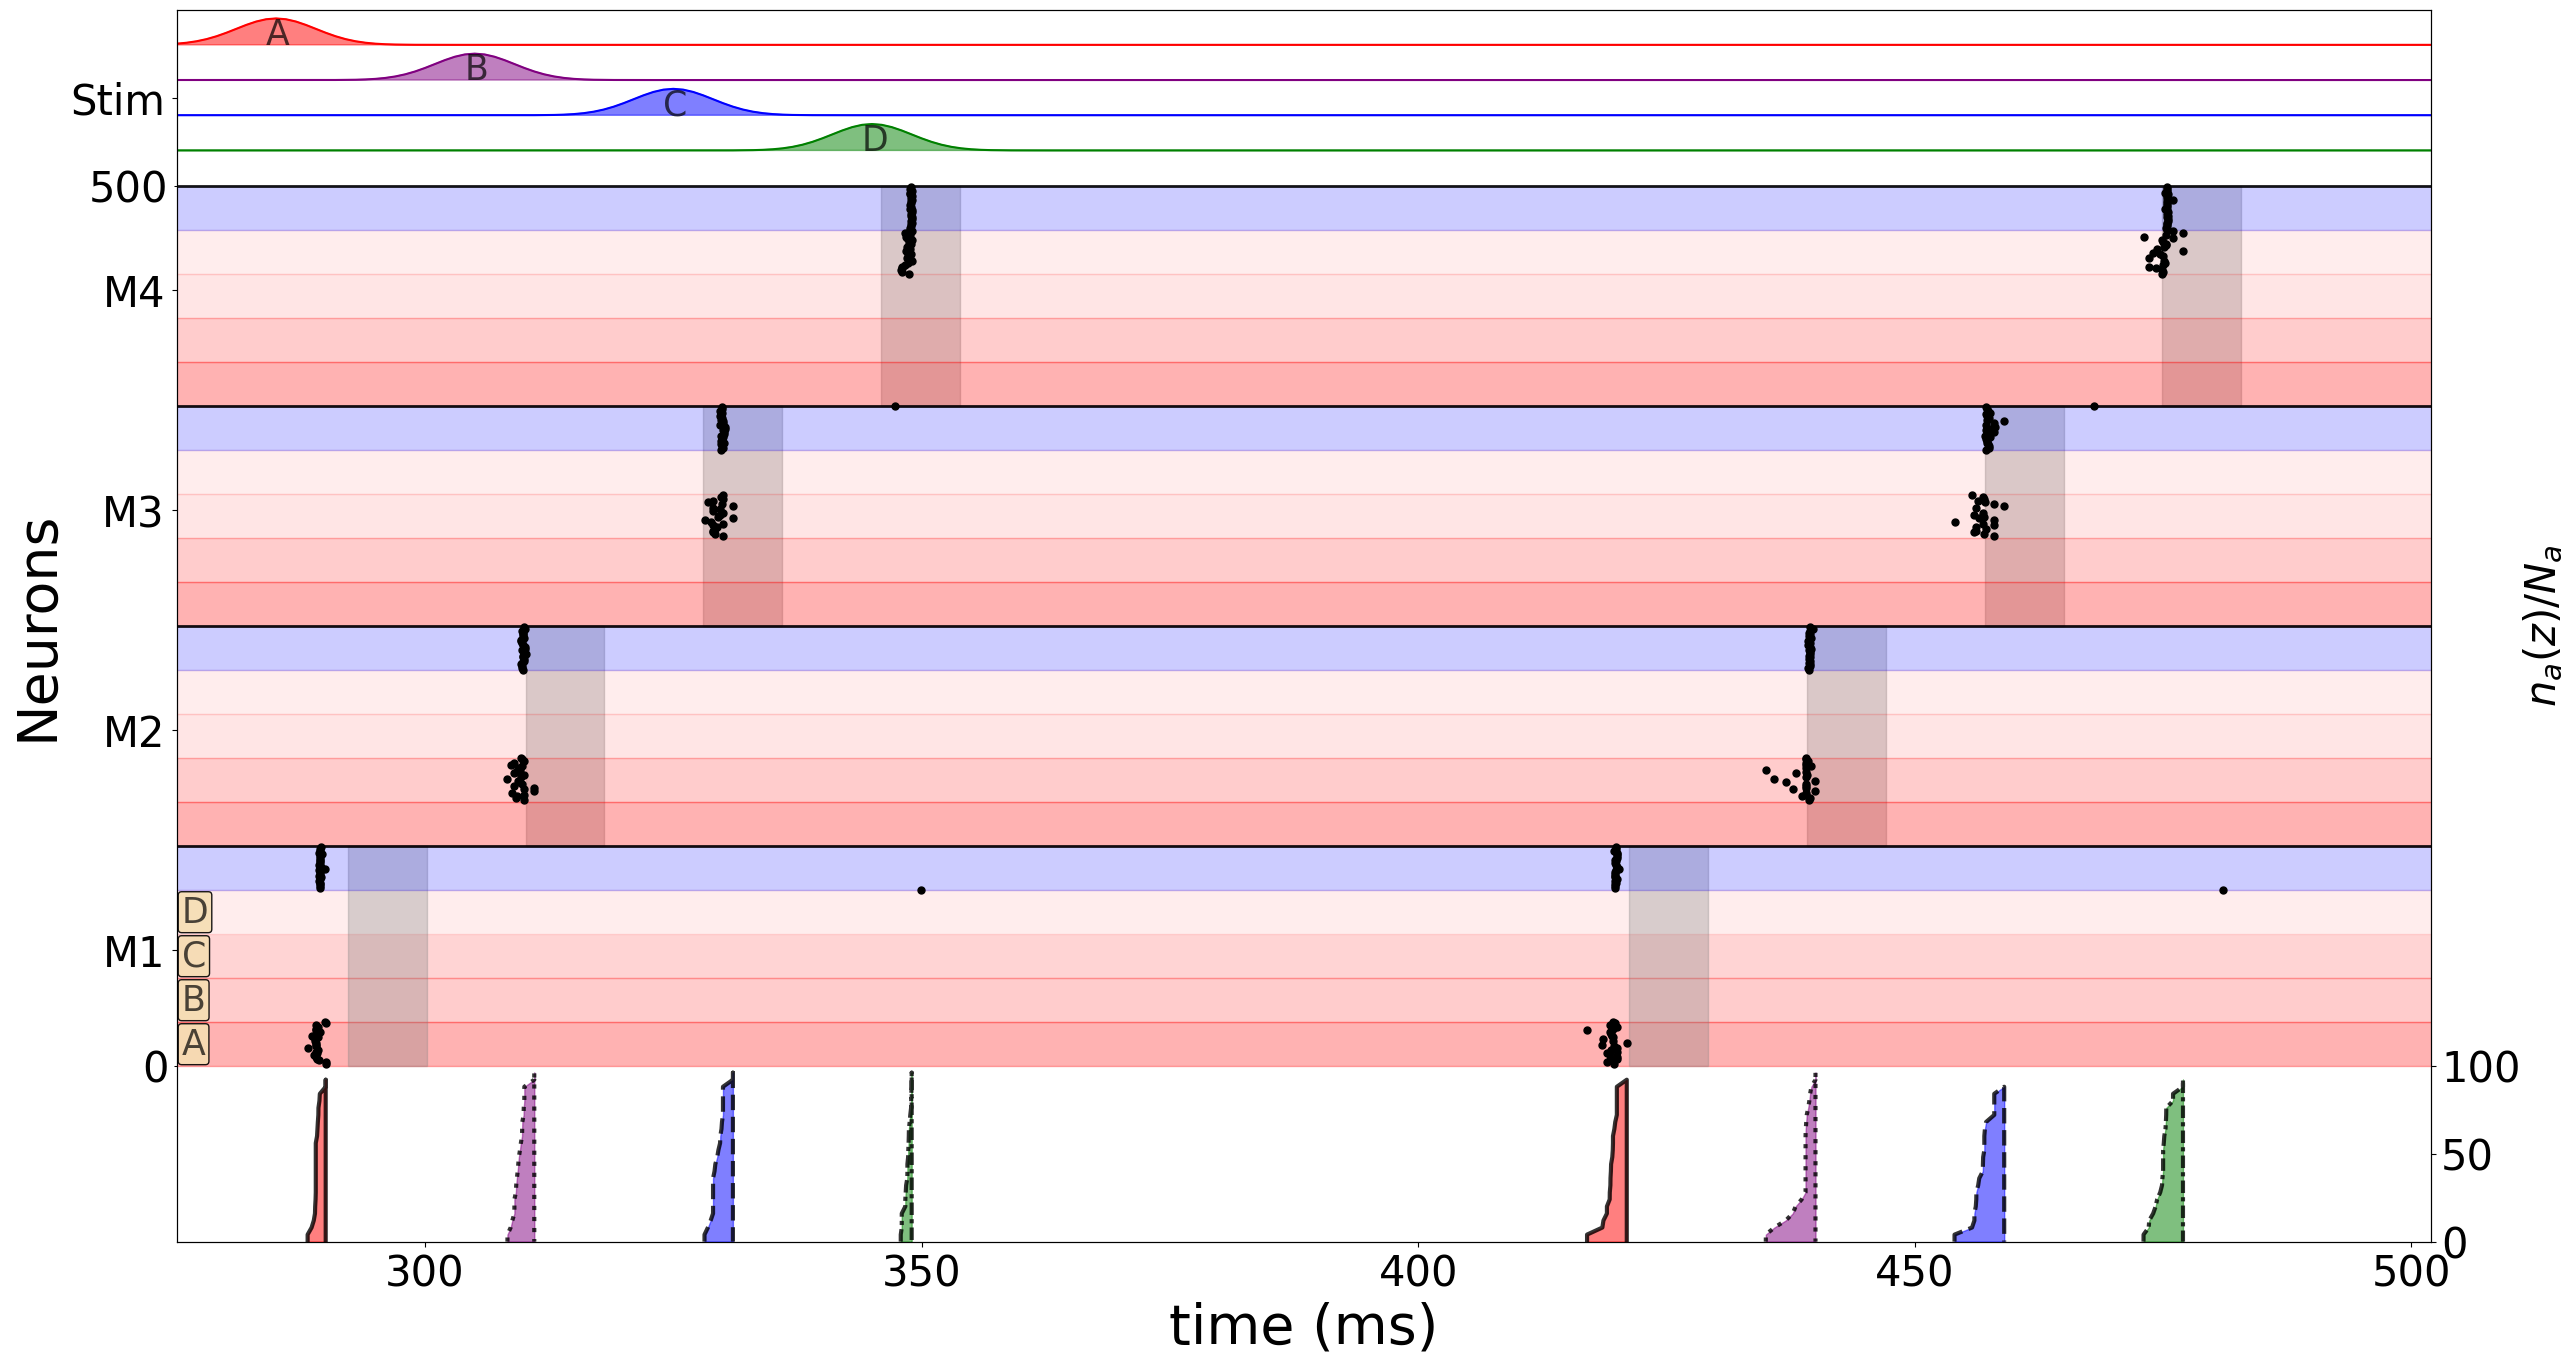

In [9]:
parameter = np.linspace(0,3000,31)
second_s = parameter

rasterplot_data_3 = data[data['delay'] == 0.9]
making_1()

for i in range(len(parameter)):
    making_2(med_i1a,med_i1b,med_i1c,med_i1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis)
    making_2(med_i2a,med_i2b,med_i2c,med_i2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis)
    making_2(med_i3a,med_i3b,med_i3c,med_i3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis)
    making_2(med_i4a,med_i4b,med_i4c,med_i4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis)

nrep=1


delayy = [1.4]
for rep in range(1,2):
    making_3()


    for i in range(len(parameter)):
        rasterplot = rasterplot_data_3[(rasterplot_data_3['tau']== parameter[i]) & (rasterplot_data_3['a']==rep)]
        raster_time = np.array(rasterplot['t'])
        raster_who = np.array(rasterplot['who'])


        a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q = quant_itens(raster_time, raster_who,250,370,1)
        a2t,b2t,c2t,d2t,a2q,b2q,c2q,d2q = quant_itens(raster_time, raster_who,350,500,1)

        a1t2,b1t2,c1t2,d1t2,a1q2,b1q2,c1q2,d1q2 = quant_itens(raster_time, raster_who,250,370,2)
        a2t2,b2t2,c2t2,d2t2,a2q2,b2q2,c2q2,d2q2 = quant_itens(raster_time, raster_who,350,500,2)


        a1t23,b1t23,c1t23,d1t23,a1q23,b1q23,c1q23,d1q23 = quant_itens(raster_time, raster_who,250,370,3)
        a2t23,b2t23,c2t23,d2t23,a2q23,b2q23,c2q23,d2q23 = quant_itens(raster_time, raster_who,350,500,3)

        a1t234,b1t234,c1t234,d1t234,a1q234,b1q234,c1q234,d1q234 = quant_itens(raster_time, raster_who,250,370,4)
        a2t234,b2t234,c2t234,d2t234,a2q234,b2q234,c2q234,d2q234 = quant_itens(raster_time, raster_who,350,500,4)


        making_4(a1q,   b1q,   c1q,   d1q,               item_1a,item_1b,item_1c,item_1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis,i)
        making_4(a1q2,  b1q2,  c1q2,  d1q2,           item_2a,item_2b,item_2c,item_2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis,i)
        making_4(a1q23, b1q23, c1q23, d1q23,       item_3a,item_3b,item_3c,item_3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis,i)
        making_4(a1q234,b1q234,c1q234,d1q234,   item_4a,item_4b,item_4c,item_4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis,i)
              #############3
        if (parameter[i] == 2000):


          fig, ax1 = plt.subplots(1,2,figsize = (64,16))


          #ax1[0].set_title("second_s =%.2f" %(parameter[i]), fontsize = 30)
          ax1[0].set_ylabel("Neurons", fontsize = 40)
          ax1[0].set_xlabel("time (ms)", fontsize = 40)
          ax1[0].set_ylim(-100,600)
          ax1[0].set_xlim(275,502)


          ax1[1].set_title("stimulus delay =%.2f ms" %(second_s[i]/100), fontsize = 60)
          ax1[1].set_ylabel("Neurons", fontsize = 40)
          ax1[1].set_xlabel("tempo (ms)", fontsize = 40)
          ax1[1].set_ylim(-150,500)
          ax1[1].set_xlim(380,500)

          ax2 = ax1[0].twinx()
          ax3 = ax1[1].twinx()



          ax1[0].set_yticks([50,150,250,350,450], minor = False)

          ax1[0].yaxis.set_major_formatter(ticker.FixedFormatter(['M1','M2', 'M3', 'M4', 'INH']))
          ax1[0].tick_params(direction='out', pad=5)


          ax1[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

          ITENS = [0,100,200,300,400,500]

          ax1[0].set_yticks(ITENS, minor = True)
          ax1[0].yaxis.set_minor_formatter(ticker.FixedFormatter(['0', '100', '200','300','400','500']))
          ax1[0].tick_params(which='minor', width=0.75, length=2.5, labelsize=30)


          ax1[0].axes.yaxis.set_label_coords(-0.05, 0.5)

          ###
          ppp= 65.5
          ax1[0].set_yticks([ppp,125+ppp,250+ppp,375+ppp, 550], minor = False)

          ax1[0].yaxis.set_major_formatter(ticker.FixedFormatter(['M1','M2', 'M3', 'M4', 'Stim']))
          ax1[0].tick_params(direction='out', pad=5)


          ax1[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

          ax1[0].set_yticks([0,500], minor = True)
          ax1[0].yaxis.set_minor_formatter(ticker.FixedFormatter(['0','500']))
          ax1[0].tick_params(which='minor', width=0.75, length=2.5, labelsize=30)


          ax1[1].axes.yaxis.set_label_coords(-0.07, 0.5)
          ax2.axes.yaxis.set_label_coords(1.04, 0.08)
          ax3.axes.yaxis.set_label_coords(1.04, 0.08)



          plot_estímulos(800)
          ciclos(0.9)
          backgroud_1()

          ## rasterplot

          rrw= []
          for iiii in range(len(raster_who)):
            if(raster_who[iiii]<400):
              rrw.append(raster_who[iiii]+ 25*int(raster_who[iiii]/100))
            else:
              rrw.append(raster_who[iiii]- 300 + 100*(int((raster_who[iiii]-400)/25)))




          ax1[0].scatter(raster_time, rrw,marker = '.', s = 100, c = 'k')
          ax1[1].scatter(raster_time, raster_who,marker = '.', s = 100, c = 'k')



          plot_modulo(a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q,a2t,b2t,c2t,d2t,a2q,b2q,c2q,d2q,'-')
          plot_modulo(a1t2,b1t2,c1t2,d1t2,a1q2,b1q2,c1q2,d1q2,a2t2,b2t2,c2t2,d2t2,a2q2,b2q2,c2q2,d2q2,':')
          plot_modulo(a1t23,b1t23,c1t23,d1t23,a1q23,b1q23,c1q23,d1q23,a2t23,b2t23,c2t23,d2t23,a2q23,b2q23,c2q23,d2q23,'--')
          plot_modulo(a1t234,b1t234,c1t234,d1t234,a1q234,b1q234,c1q234,d1q234,a2t234,b2t234,c2t234,d2t234,a2q234,b2q234,c2q234,d2q234,(0, (3, 1, 1, 1)))

          ax2.set_ylim(-200,500)
          ax2.set_yticks([-200,-150,-100])
          ax2.yaxis.set_major_formatter(ticker.FixedFormatter(['0','50', '100']))

          ax3.set_ylim(-150,500)
          ax3.set_yticks([-150,-100,-50])
          ax3.yaxis.set_major_formatter(ticker.FixedFormatter(['0','50', '100']))

          ax2.set_ylabel(r"$n_a(z)/N_a$", fontsize = 30, labelpad = 500)





          ax3.set_ylabel("% of item", fontsize = 30)


          ax1[0].tick_params(labelsize = 30)
          ax1[1].tick_params(labelsize = 30)

          ax2.tick_params(labelsize = 30)
          ax3.tick_params(labelsize = 30)
          ##plt.legend(fontsize = 15, loc = 'upper left')
          #fig.tight_layout()
          fig.delaxes(ax1[1])
          fig.delaxes(ax3)


          yy = 0

          parameter[0] = 2000

          up = 600


          lalala1 = (up-20+ 15*np.exp(((-0.5*((np.linspace(0,700,701)-np.full(701,285+yy))/(np.array(400)/100))**2))))
          lalala2 = (up-40+ 15*np.exp(((-0.5*((np.linspace(0,700,701)-np.full(701,285+np.array(parameter[i])/100+yy))/(np.array(400)/100))**2))))
          lalala3 = (up-60+ 15*np.exp(((-0.5*((np.linspace(0,700,701)-np.full(701,285+np.array(parameter[i])/100*2+yy))/(np.array(400)/100))**2))))
          lalala4 = (up-80+ 15*np.exp(((-0.5*((np.linspace(0,700,701)-np.full(701,285+np.array(parameter[i])/100*3+yy))/(np.array(400)/100))**2))))

          ax1[0].plot(lalala1, c = 'r')
          ax1[0].plot(lalala2, c = 'purple')
          ax1[0].plot(lalala3, c = 'b')
          ax1[0].plot(lalala4, c = 'g')

          ax1[0].fill_between(np.linspace(0,700,701),lalala1, np.full(701,-20+up),color = 'r', alpha= 0.5)
          ax1[0].fill_between(np.linspace(0,700,701),lalala2, np.full(701,-40+up),color = 'purple', alpha= 0.5)
          ax1[0].fill_between(np.linspace(0,700,701),lalala3, np.full(701,-60+up),color = 'b', alpha= 0.5)
          ax1[0].fill_between(np.linspace(0,700,701),lalala4, np.full(701,-80+up),color = 'g', alpha= 0.5)

          #plt.savefig("raster_loading.png")
          plt.show()



    #############3


    making_5(med_i1a,med_i1b,med_i1c,med_i1d,item_1a,item_1b,item_1c,item_1d, parameter)
    making_5(med_i2a,med_i2b,med_i2c,med_i2d,item_2a,item_2b,item_2c,item_2d, parameter)
    making_5(med_i3a,med_i3b,med_i3c,med_i3d,item_3a,item_3b,item_3c,item_3d, parameter)
    making_5(med_i4a,med_i4b,med_i4c,med_i4d,item_4a,item_4b,item_4c,item_4d, parameter)

making_6(med_i1a, med_i1b, med_i1c, med_i1d, parameter, nrep)
making_6(med_i2a, med_i2b, med_i2c, med_i2d, parameter, nrep)
making_6(med_i3a, med_i3b, med_i3c, med_i3d, parameter, nrep)
making_6(med_i4a, med_i4b, med_i4c, med_i4d, parameter, nrep)


# Figure 4 and S1 (same data)
Figure 4 contains plots of the LOAD operations.

## Figure 4a
Figure 4a constains a graphical analytical sketch of the main variables.

<ipython-input-10-ca2f0314d9ed>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,fontsize=45)
<ipython-input-10-ca2f0314d9ed>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


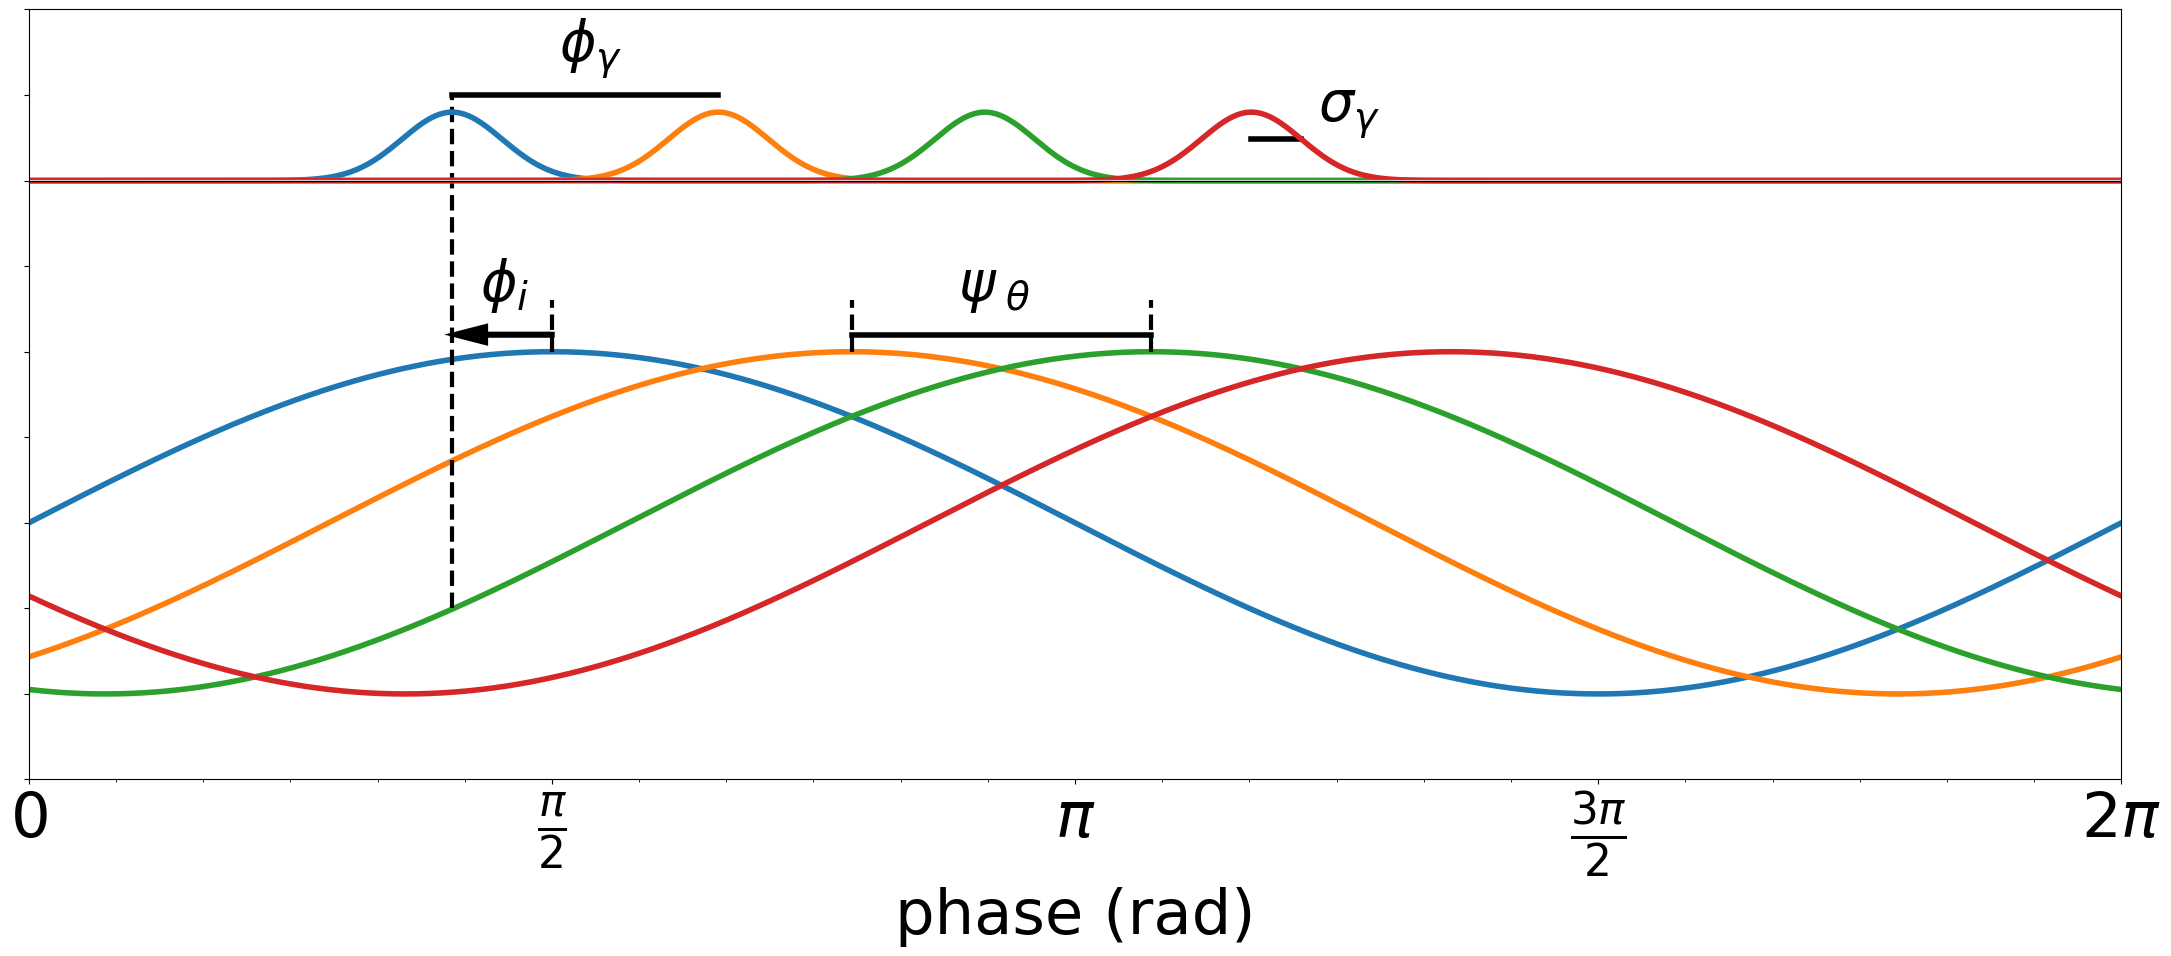

In [10]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter



x = linspace(0,2*pi,1000)
t = linspace(0,2*pi,1000)
A = 1.0
# input
sigma = 0.15
phi   = pi/2-0.3
gamma = 0.8
theta = 0.9
offset = 2.0
fig = figure(figsize=[27,10])
ax = fig.add_subplot(111)
ax.axis([0,2*pi,-1.5*A,3.0*A])
# theta oscillations
ax.plot(x,A*sin(x),'tab:blue', lw =4)
ax.plot(x,A*sin(x-theta),'tab:orange', lw = 4)
ax.plot(x,A*sin(x-2*theta),'tab:green', lw = 4)
ax.plot(x,A*sin(x-3*theta),'tab:red', lw = 4)
ax.plot([pi/2+theta,pi/2+theta],[1.0,1.3],'k--',linewidth=3)
ax.plot([pi/2+2*theta,pi/2+2*theta],[1.0,1.3],'k--',linewidth=3)
ax.text(pi/2+1.4*theta-0.04,1.30,r"$\psi_{\;\theta}$",color="black",fontsize=40)
ax.plot([pi/2+theta,pi/2+2*theta],[1.1,1.1],'k', lw = 4)
# input
ax.text(phi+gamma/2.5,offset+0.7,r"$\phi_{\gamma}$",color="black",fontsize=40)
ax.plot([phi,phi],[-0.5,2.5],'k--',linewidth=3)
ax.plot([phi,phi+gamma],[offset+0.5,offset+0.5],'k', lw = 4)
ax.plot([pi/2,pi/2],[1.0,1.3],'k--',linewidth=3)
ax.text(phi/2+0.72,1.30,r"$\phi_i$",color="black",fontsize=40)
#ax.plot([pi/2,phi],[1.1,1.1],'k', lw = 4)
ax.arrow(pi/2,1.1, -0.2,0, head_width=0.09, head_length=0.09, lw = 4,fc="k", ec="k")
ax.text(phi+3*gamma+0.2,offset+0.35,r"$\sigma_\gamma$",color="black",fontsize=40)
ax.plot([phi+3*gamma,phi+3*gamma+sigma],[offset+0.4*exp(-1/2),offset+0.4*exp(-1/2)],'k', lw = 4)
ax.plot(x,offset+0.4*exp(-(x-phi)**2/sigma**2/2),'tab:blue', lw = 4)
ax.plot(x,offset+0.4*exp(-(x-phi-gamma)**2/sigma**2/2),'tab:orange', lw = 4)
ax.plot(x,offset+0.4*exp(-(x-phi-2*gamma)**2/sigma**2/2),'tab:green', lw = 4)
ax.plot(x,offset+0.4*exp(-(x-phi-3*gamma)**2/sigma**2/2),'tab:red', lw = 4)
ax.plot([0,2*pi],[offset,offset],'white')
ax.plot([0,2*pi],[offset,offset],'k',linewidth=1)
# axis
ax.set_xlabel("phase (rad)",fontsize=45)
#ax.set_ylabel(r"$\psi$")
ax.set_yticklabels([])
ax.set_xticklabels(x,fontsize=45)
ax.xaxis.set_major_locator(MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(FuncFormatter(multiple_formatter()))
plt.savefig('t.png', bbox_inches='tight')

## Figure 4C and S1
Figure 4c is a subset of figure S1, exploring the whole $f_{\gamma}$ window for 3 different initial conditions.

### Figure S1 A

<ipython-input-11-55cbb3e170b4>:183: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-11-55cbb3e170b4>:204: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((z*0.1),1000/

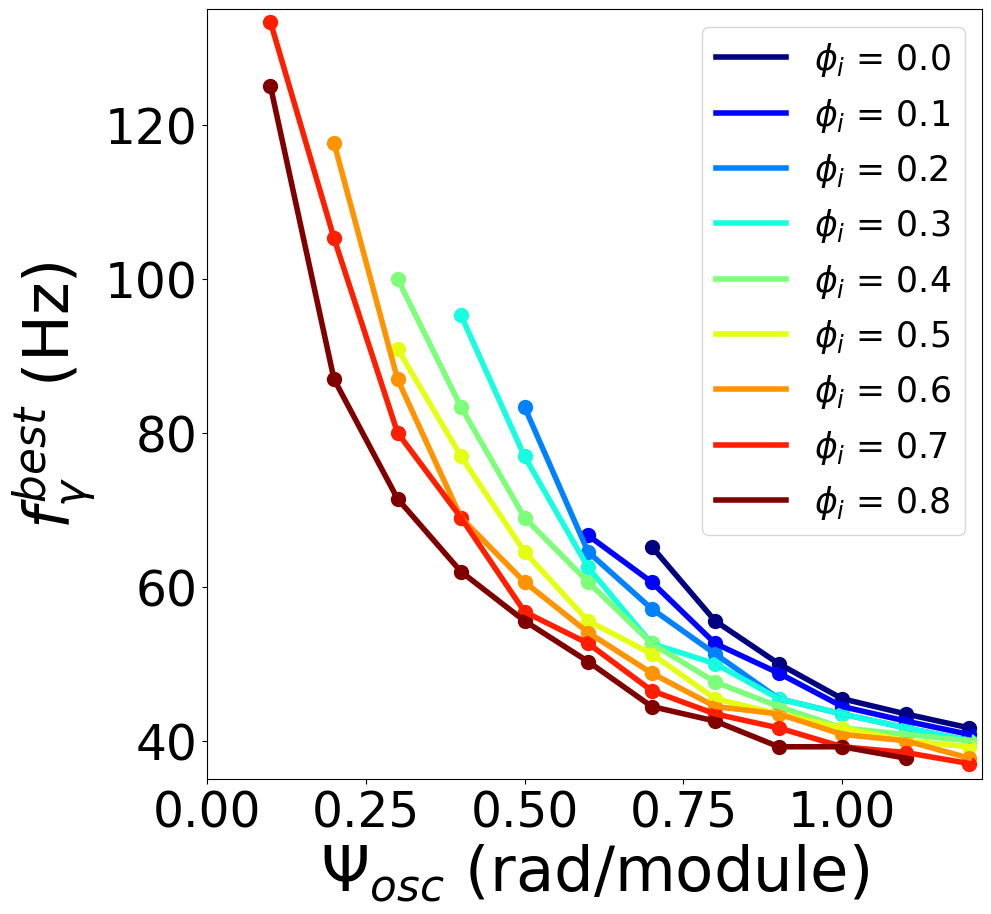

In [11]:
r = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 3 and S1/fig3b_3c_s1.dat', sep = '\t')
datas = []
for phi_i in r['a'].unique():
  aux = r[r['a'] == phi_i]
  datas.append(aux)


parameter = np.linspace(0,3000,31)
second_s = parameter


v_onda = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
M_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

AM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

BM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

CM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

DM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
for d_inicial in range(len(datas)):
  r = datas[d_inicial]
  mm_matriz = [[],[]] #
  Amm_matriz = [[],[]]
  Bmm_matriz = [[],[]]
  Cmm_matriz = [[],[]]
  Dmm_matriz = [[],[]]
  for data in range(len(v_onda)):
    rasterplot_data_3 = r[r['delay'] == v_onda[data]]
    making_1()

    for i in range(len(parameter)):
        making_2(med_i1a,med_i1b,med_i1c,med_i1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis)
        making_2(med_i2a,med_i2b,med_i2c,med_i2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis)
        making_2(med_i3a,med_i3b,med_i3c,med_i3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis)
        making_2(med_i4a,med_i4b,med_i4c,med_i4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis)

    nrep=1


    delayy = [1.4]
    for rep in range(1,nrep+1):
        making_3()


        for i in range(len(parameter)):
            rasterplot = rasterplot_data_3[(rasterplot_data_3['tau']== parameter[i])]
            raster_time = np.array(rasterplot['t'])
            raster_who = np.array(rasterplot['who'])


            a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q = quant_itens(raster_time, raster_who,250,370,1)
            a2t,b2t,c2t,d2t,a2q,b2q,c2q,d2q = quant_itens(raster_time, raster_who,350,500,1)

            a1t2,b1t2,c1t2,d1t2,a1q2,b1q2,c1q2,d1q2 = quant_itens(raster_time, raster_who,250,370,2)
            a2t2,b2t2,c2t2,d2t2,a2q2,b2q2,c2q2,d2q2 = quant_itens(raster_time, raster_who,350,500,2)


            a1t23,b1t23,c1t23,d1t23,a1q23,b1q23,c1q23,d1q23 = quant_itens(raster_time, raster_who,250,370,3)
            a2t23,b2t23,c2t23,d2t23,a2q23,b2q23,c2q23,d2q23 = quant_itens(raster_time, raster_who,350,500,3)

            a1t234,b1t234,c1t234,d1t234,a1q234,b1q234,c1q234,d1q234 = quant_itens(raster_time, raster_who,250,370,4)
            a2t234,b2t234,c2t234,d2t234,a2q234,b2q234,c2q234,d2q234 = quant_itens(raster_time, raster_who,350,500,4)


            making_4(a1q,   b1q,   c1q,   d1q,               item_1a,item_1b,item_1c,item_1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis,i)
            making_4(a1q2,  b1q2,  c1q2,  d1q2,           item_2a,item_2b,item_2c,item_2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis,i)
            making_4(a1q23, b1q23, c1q23, d1q23,       item_3a,item_3b,item_3c,item_3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis,i)
            making_4(a1q234,b1q234,c1q234,d1q234,   item_4a,item_4b,item_4c,item_4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis,i)

        making_5(med_i1a,med_i1b,med_i1c,med_i1d,item_1a,item_1b,item_1c,item_1d, parameter)
        making_5(med_i2a,med_i2b,med_i2c,med_i2d,item_2a,item_2b,item_2c,item_2d, parameter)
        making_5(med_i3a,med_i3b,med_i3c,med_i3d,item_3a,item_3b,item_3c,item_3d, parameter)
        making_5(med_i4a,med_i4b,med_i4c,med_i4d,item_4a,item_4b,item_4c,item_4d, parameter)

    making_6(med_i1a, med_i1b, med_i1c, med_i1d, parameter, nrep)
    making_6(med_i2a, med_i2b, med_i2c, med_i2d, parameter, nrep)
    making_6(med_i3a, med_i3b, med_i3c, med_i3d, parameter, nrep)
    making_6(med_i4a, med_i4b, med_i4c, med_i4d, parameter, nrep)

    for ii in range(len(med_i1a)):
      #mm_matriz[0].append(data)
      if((med_i1a[ii] > med_i1b[ii]) & (med_i1a[ii] > med_i1c[ii]) &(med_i1a[ii] > med_i1d[ii])):
        if((med_i2b[ii] > med_i2a[ii]) & (med_i2b[ii] > med_i2c[ii]) & (med_i2b[ii] > med_i2d[ii])):
          if((med_i3c[ii] > med_i3b[ii]) & (med_i3a[ii] < med_i3c[ii]) & (med_i3c[ii] > med_i3d[ii])):
            if((med_i4d[ii] > med_i4b[ii]) & (med_i4d[ii] > med_i4c[ii]) & (med_i4a[ii] < med_i4d[ii])):
              #if((med_i1a[ii] >= 25*0.7) & (med_i2b[ii] >= 25*0.7) & (med_i3c[ii] >= 25*0.7) & (med_i4d[ii] >= 25*0.7)):
              #print(data,ii*0.5)
              mm_matriz[0].append(data)
              mm_matriz[1].append(ii*0.5*2)#what is 0.5?
            #else:
              #mm_matriz[1].append(0)

      if((med_i1a[ii] > med_i1b[ii]) & (med_i1a[ii] > med_i1c[ii]) &(med_i1a[ii] > med_i1d[ii])):
        Amm_matriz[1].append(ii*0.5*2)
        Amm_matriz[0].append(data)
      if((med_i2b[ii] > med_i2a[ii]) & (med_i2b[ii] > med_i2c[ii]) & (med_i2b[ii] > med_i2d[ii])):
        Bmm_matriz[1].append(ii*0.5*2)
        Bmm_matriz[0].append(data)
      if((med_i3c[ii] > med_i3b[ii]) & (med_i3a[ii] < med_i3c[ii]) & (med_i3c[ii] > med_i3d[ii])):
        Cmm_matriz[1].append(ii*0.5*2)
        Cmm_matriz[0].append(data)
      if((med_i4d[ii] > med_i4b[ii]) & (med_i4d[ii] > med_i4c[ii]) & (med_i4a[ii] < med_i4d[ii])):
        Dmm_matriz[1].append(ii*0.5*2)
        Dmm_matriz[0].append(data)

    M_mm_matriz[d_inicial] = mm_matriz

    AM_mm_matriz[d_inicial] = Amm_matriz

    BM_mm_matriz[d_inicial] = Bmm_matriz

    CM_mm_matriz[d_inicial] = Cmm_matriz

    DM_mm_matriz[d_inicial] = Dmm_matriz


####


MM=[]
MMA=[]
MMB=[]
MMC=[]
MMD=[]
for k in range(len(datas)):
  MM_conjunto = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoA = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoB = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoC = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoD = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

  mm_matriz = M_mm_matriz[k]
  for i in range(len(mm_matriz[0])):
    for y in range(len(v_onda)):
      if (mm_matriz[0][i]== y):
        MM_conjunto[y].append(mm_matriz[1][i])

  MM.append(MM_conjunto)

  Amm_matriz = AM_mm_matriz[k]
  for i in range(len(Amm_matriz[0])):
    for y in range(len(v_onda)):
      if (Amm_matriz[0][i]== y):
        MM_conjuntoA[y].append(Amm_matriz[1][i])

  MMA.append(MM_conjuntoA)


  Bmm_matriz = BM_mm_matriz[k]
  for i in range(len(Bmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Bmm_matriz[0][i]== y):
        MM_conjuntoB[y].append(Bmm_matriz[1][i])

  MMB.append(MM_conjuntoB)


  Cmm_matriz = CM_mm_matriz[k]
  for i in range(len(Cmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Cmm_matriz[0][i]== y):
        MM_conjuntoC[y].append(Cmm_matriz[1][i])

  MMC.append(MM_conjuntoC)


  Dmm_matriz = DM_mm_matriz[k]
  for i in range(len(Dmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Dmm_matriz[0][i]== y):
        MM_conjuntoD[y].append(Dmm_matriz[1][i])

  MMD.append(MM_conjuntoD)


######

plt.figure(figsize = (10,10))


jet = cm.get_cmap('jet')
jet_9_colors = jet(np.linspace(0, 1, 9))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

plt.ylim([35,135])
plt.xlim([0.0,1.22])
plt.ylabel(r"$f_{\gamma}^{best}$ (Hz)",fontsize = 45)
plt.xlabel(r"$\Psi_{osc}$ (rad/module)", fontsize = 45)
colors= ['k','g','b','y','orange','lime','r','grey','pink']
tt=[]
xxx = []
yyy = []
for k in range(len(datas)):
  t=[]
  zz=[]
  MM_conjunto = MM[k]
  for z in range(len(MM_conjunto)):
    t.append(np.mean(MM_conjunto[z]))
    zz.append(z)
    plt.scatter((z*0.1),1000/np.mean(MM_conjunto[z]),c = jet_9_colors[k], s = 100)
    #print(MM_conjunto[z])
  kk= k/10
  plt.plot(np.array(zz)*0.1,1000/(np.array(t)), c= jet_9_colors[k], label = r'$\phi_i$ = %.1f' % (kk), lw = 4)
  xxx.append(np.array(zz)*0.1)
  yyy.append(1000/np.array(t))
  plt.legend(fontsize = 25)
  tt.append(t)
plt.tick_params(labelsize = 35)
#plt.savefig('111.png',bbox_inches='tight')
plt.show()





### Figure 4C

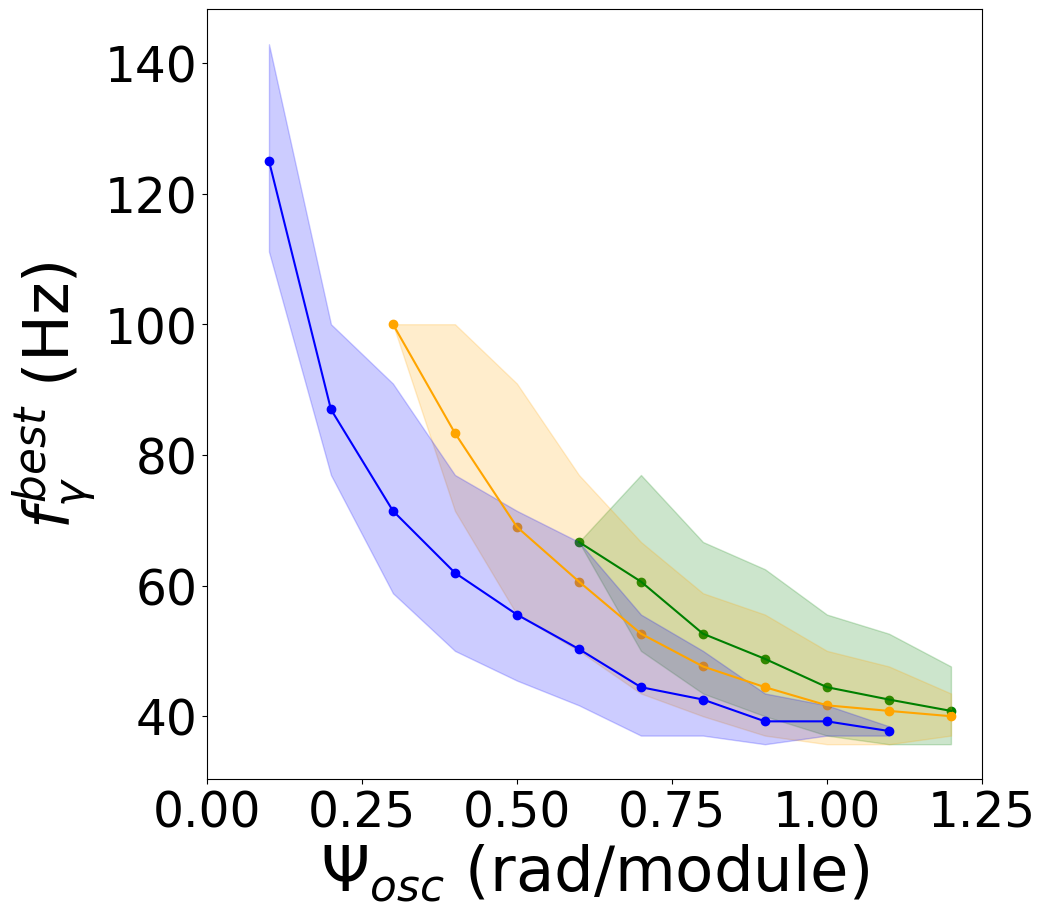

In [12]:

plt.figure(figsize = (10,10))
plt.plot(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[1]], c = 'g')
plt.scatter(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[1]], c = 'g')
a = [1000/x[0] if len(x)>0 else nan for x in MM[1]]
b = [1000/x[-1] if len(x) > 0 else nan for x in MM[1]]
plt.fill_between(np.array(zz)*0.1,b,a,alpha = 0.2, color = 'g')

plt.plot(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[4]], c = 'orange')
plt.scatter(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[4]], c = 'orange')
a = [1000/x[0] if len(x)>0 else nan for x in MM[4]]
b = [1000/x[-1] if len(x) > 0 else nan for x in MM[4]]
plt.fill_between(np.array(zz)*0.1,b,a,alpha = 0.2, color = 'orange')

plt.plot(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[8]], c = 'b')
plt.scatter(np.array(zz)*0.1,[1000/np.mean(x) for x in MM[8]], c = 'b')
a = [1000/x[0] if len(x)>0 else nan for x in MM[8]]
b = [1000/x[-1] if len(x) > 0 else nan for x in MM[8]]
plt.fill_between(np.array(zz)*0.1,b,a,alpha = 0.2, color = 'b')

plt.xlim(0,1.25)
#plt.ylim(0,140)

plt.ylabel(r"$f_{\gamma}^{best}$ (Hz)",fontsize = 45)
plt.xlabel(r"$\Psi_{osc}$ (rad/module)", fontsize = 45)
plt.tick_params(labelsize = 35)

### Figure S1 B

<ipython-input-13-9b43d718f965>:23: RuntimeWarning: invalid value encountered in double_scalars
  mean.append(j/cnz[i])


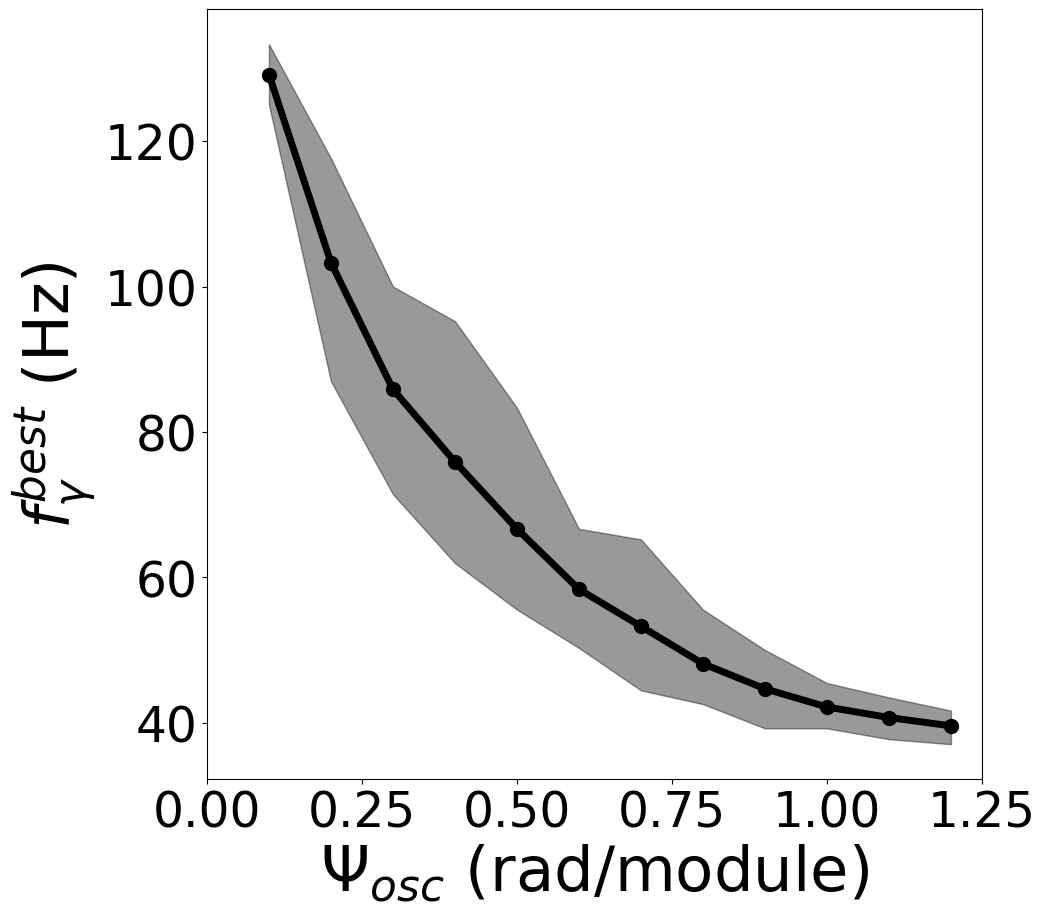

In [13]:
yy2= []
for z in yyy:
 yy2.append([0 if np.isnan(x) == True else x for x in z])


minn = [nan]
maxx = [nan]
for i in np.array(yy2).T[1:]:
  j = [z for z in i if z > 0]
  minn.append(np.min(j))
  maxx.append(np.max(j))


cnz = []
for i in np.array(yy2).T:
  cnz.append(np.count_nonzero(i))


sum = np.array(yy2).T.sum(axis = 1)

mean = []
for i,j in enumerate(sum):
  mean.append(j/cnz[i])



plt.figure(figsize = (10,10))
plt.xlim(0,1.25)
#plt.ylim(0,140)

plt.plot(np.array(zz)*0.1,mean, lw = 5,c = 'k')
plt.scatter(np.array(zz)*0.1,mean,s = 100,c = 'k')
plt.fill_between(np.array(zz)*0.1, minn, maxx, color= 'k', alpha = 0.4)


plt.ylabel(r"$f_{\gamma}^{best}$ (Hz)",fontsize = 45)
plt.xlabel(r"$\Psi_{osc}$ (rad/module)", fontsize = 45)
plt.tick_params(labelsize = 35)


## Figure 4b
Figure 4b contains a 2D map of the $f_{best}^{\gamma}$ in relation to $\phi_i$ and $\Psi_{OSC}$ during the LOAD operation.

<Figure size 10000x10000 with 0 Axes>

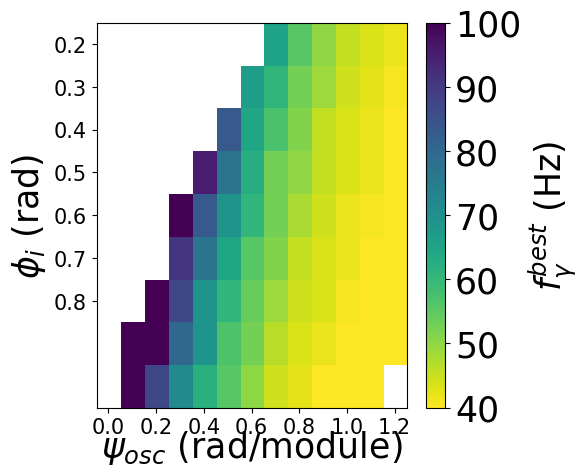

In [14]:
plt.figure(figsize = (100,100))
a=np.array(tt)
fig, ax = plt.subplots(1,1, figsize = (5,5))



cax = ax.imshow(1000/a[:], aspect='auto', vmin = 40,vmax=100, cmap = 'viridis_r')
plt.xticks([0,2,4,6,8,10,12], labels= [0.0,0.2,0.4,0.6,0.8,1.0,1.2])
plt.yticks([0,1,2,3,4,5,6], labels= [0.2,0.3,0.4,0.5,0.6,0.7,0.8])
#ax.set_xlabel(r"$\theta$ speed (rad/module)",fontsize = 35)
ax.set_title(r"$\psi_{osc}$ (rad/module)",fontsize = 25,y=-0.15)
plt.xticks(rotation=0)
plt.ylabel(r"$\phi_i$ (rad)", fontsize =25)
plt.tick_params(labelsize= 15)
cbar = fig.colorbar(cax, ticks=[40,50,60,70,80,90,100],orientation='vertical')
cbar.set_label(label=r"$f_\gamma^{best}$ (Hz)",size=25)
cbar.ax.tick_params(labelsize=25)
cbar.ax.invert_xaxis()

plt.subplots_adjust(top=0.88)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
#plt.savefig('222.png',bbox_inches='tight')

## Figure 4d
Figure 4d takes the values of $f_\gamma^{best} founded in 3b and shows the values of the parameter Oc for the first cycles, together with rasterplot samples. The map plots are the average of 50 simulations.

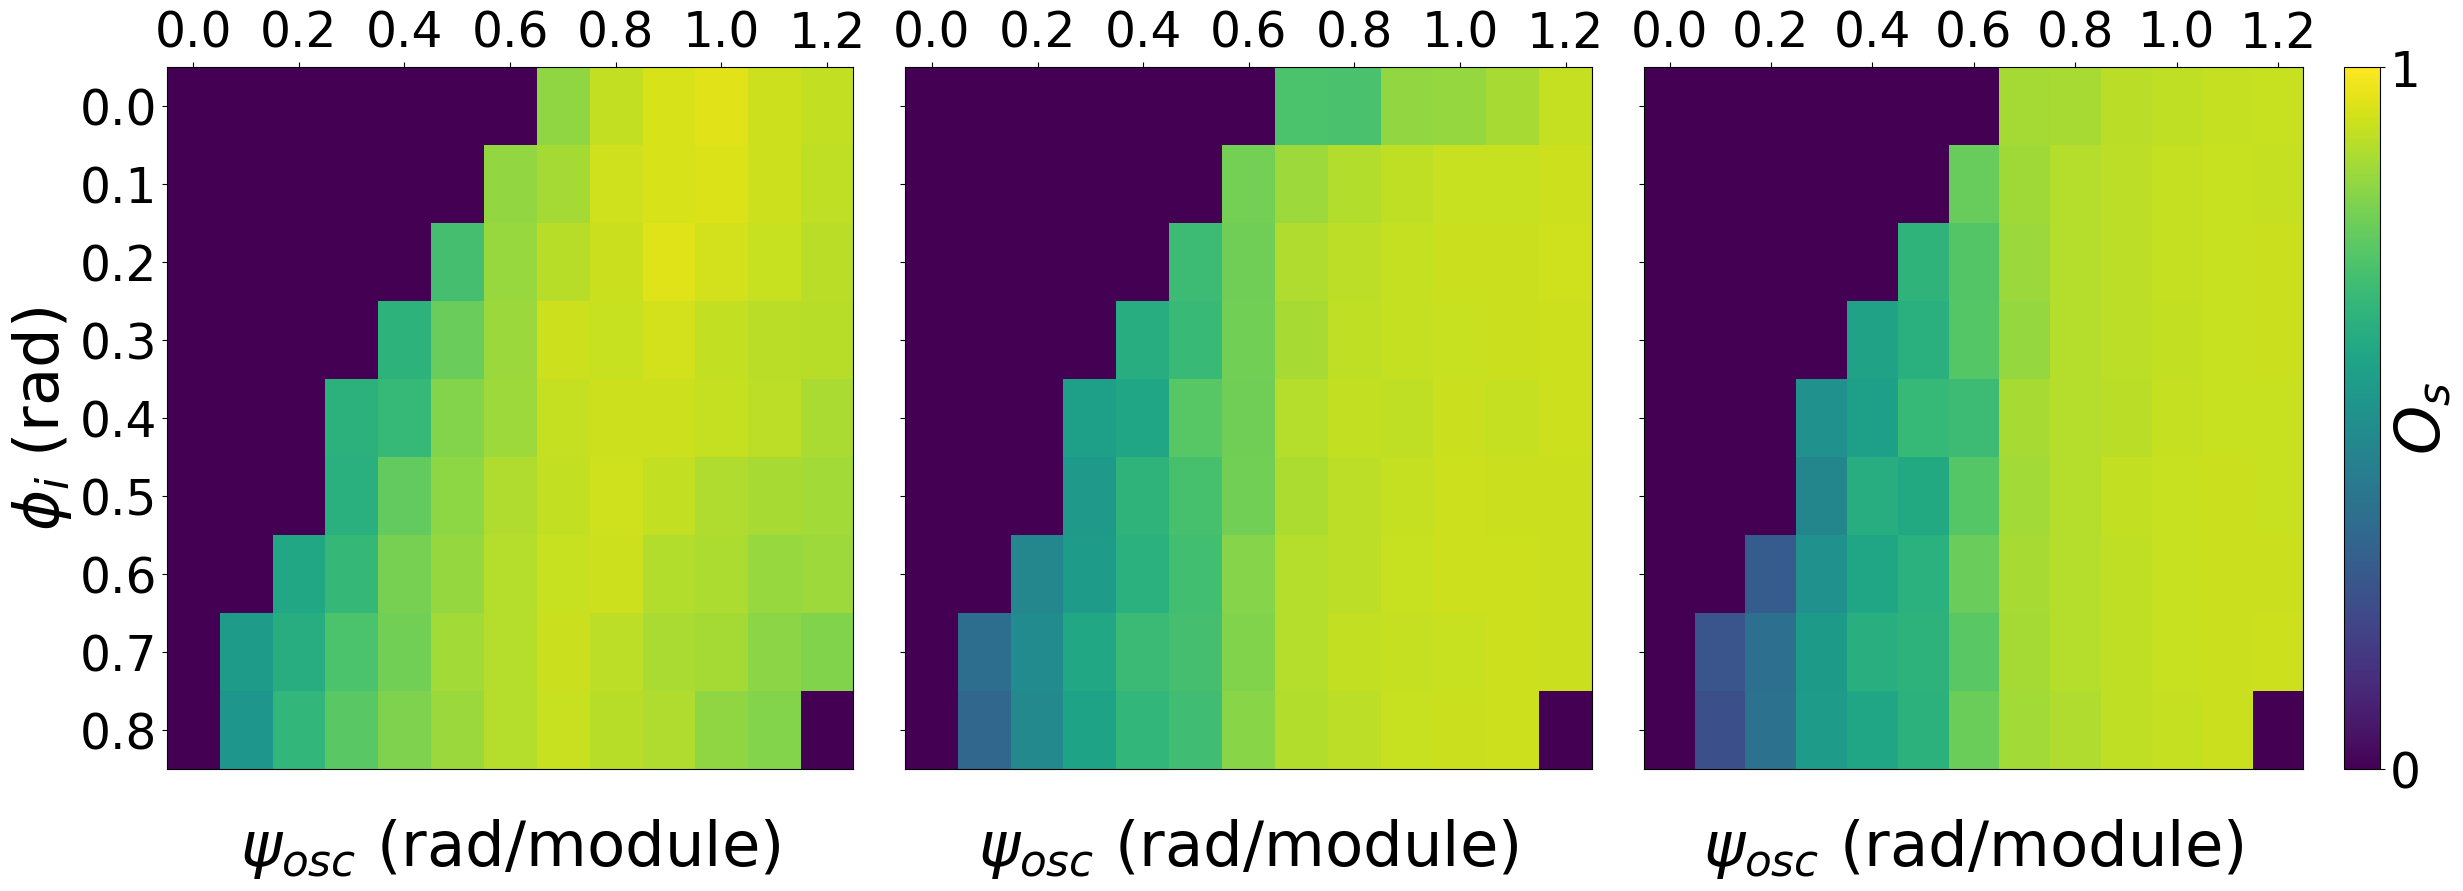

In [15]:
r = pd.read_csv('/content/drive/MyDrive/Artigo Plos One/Data/Figure 3 and S1/fig3d.dat', sep = '\t')
r.reset_index(level=0, inplace=True)
r = r.rename(columns = {'index': 't', 't': 'who', 'who': 'phi_i','a' : 'psi_osc','delay' : 'f_gamma', 'tau':'rep'}, inplace = False)

r = r[r['who']<400]
phi_i = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
psi_osc = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
f_gamma = r['f_gamma'].unique()


ciclo = [259,400,530,670,750,879,1000,1140,1250,1390,1530,1690]
lim_inferior = ciclo[:-1]
lim_superior = ciclo[1:]


def Oc(r,REPP):
  rr = r[r['rep']== REPP]
  exper = [[],[],[],[]]
  for phi in range(len(phi_i)):
    for psi in range(len(psi_osc)):
      exper[0].append(phi_i[phi])
      exper[1].append(psi_osc[psi])
      exper[2].append(rr[(rr['phi_i']==phi_i[phi]) & (rr['psi_osc']==psi_osc[psi])])


  experimentos = exper[2]


  ciciclo = [259,400,520,670,750,879,1000,1140,1250,1390,1530,1690]
  EE = []
  TT = []

  EE.append([])
  TT.append([])

  lim_Ei = [0,101,201,301]
  lim_Es = [101,201,301,401]

  beta = 1
  cfim = 3
  ciclos = np.linspace(0,cfim,cfim-1)


  delta_t = 20

  Occ = []
  Oaa = []
  Oss = []
  for exp2 in range(1,117):
          #print(exp2)
          exp = int(exp2)

          EE.append([])
          TT.append([])
          i = exp
          EE[exp]= [[],[],[],[]]
          TT[exp] = [[],[],[],[]]
          for ensemble in range(4):#LOOP dos ENSEMBLES
              for ciclo in range(cfim):#LOOP dos CICLOS
                  a = experimentos[exp-1]
                  a = a[(a['t'] > lim_inferior[ciclo]) & (a['t'] < lim_superior[ciclo])]
                  a = a[(a['who'] > lim_Ei[ensemble]) & (a['who'] < lim_Es[ensemble])]
                  EE[exp][ensemble].append(a['t'])
                  TT[exp][ensemble].append(a['who'])








          Os =np.zeros(shape=(4,cfim))

          for ensemble in range(4):
              for cicle in range(cfim):

                  fired = []
                  for who in TT[exp][ensemble][cicle]:
                      if who not in fired:
                          fired.append(who)

                  how_many_fired = len(fired)

                  aux  = (how_many_fired/25)*(1 - (np.sqrt(2)*np.std(EE[exp][ensemble][cicle])/(delta_t))**(beta))
                  if aux > 0:
                      Os[ensemble][cicle] = aux
                  elif aux > 1:
                      Os[ensemble][cicle] = 1
                  else:
                      Os[ensemble][cicle] = 0

          Os_mean = []

          for cicle in range(cfim):
            aux = 0
            for ensemble in range(4):
                aux += Os[ensemble][cicle]
            Os_mean.append(aux/4)


          Oa = np.zeros(shape=(cfim,10))

          for cicle in range(cfim):#agora usei cicle pra identificar que é loop em ciclos (podia ter usado antes)
              combinacao= -1
              for grupo1 in range(4):
                  for grupo2 in range(grupo1,4):
                      if grupo1 != grupo2:
                          combinacao += 1
                          #print(len(EE[exp][grupo2][cicle]))

                          aux = abs(np.mean((EE[exp][grupo1][cicle])) - np.mean((EE[exp][grupo2][cicle])))/delta_t

                          if(aux<-5):
                            print(exper[0][exp2],exper[1][exp2],(len(EE[exp][grupo2][cicle]),(len(EE[exp][grupo1][cicle]))), "{:.0f}".format(np.mean((EE[exp][grupo1][cicle]))),"{:.0f}".format(np.mean((EE[exp][grupo2][cicle]))), "{:.2f}".format(aux))
                            if(len((EE[exp][grupo1][cicle]))>40):
                              print((TT[exp][grupo1][cicle]))
                          if aux > 1:
                              Oa[cicle][combinacao] = 1
                          elif math.isnan(aux) == True:
                              Oa[cicle][combinacao] = 0
                          else:
                              Oa[cicle][combinacao] = aux


          Oa_mean = []

          for cicle in range(cfim):
              Oa_mean.append((2/(4*(4-1)))*np.sum(Oa[cicle][:]))

          Oc = []



          for i in range(cfim):#cicle tbm
              Oc.append(Os_mean[i]*Oa_mean[i])

          Occ.append(Oc)
          Oaa.append(Oa_mean)
          Oss.append(Os_mean)

  return Occ, Oaa, Oss




MMAE = [[],[],[]]




M1 = np.zeros([9,13])

M2 = np.zeros([9,13])

M3 = np.zeros([9,13])
for REPP in range(1,50):

  M1_M = np.zeros([9,13])

  M2_M = np.zeros([9,13])

  M3_M = np.zeros([9,13])


  rr = r[r['rep']== REPP]
  exper = [[],[],[],[]]
  for phi in range(len(phi_i)):
    for psi in range(len(psi_osc)):
      exper[0].append(phi_i[phi])
      exper[1].append(psi_osc[psi])
      exper[2].append(rr[(rr['phi_i']==phi_i[phi]) & (rr['psi_osc']==psi_osc[psi])])


  experimentos = exper[2]


  ciciclo = [259,400,530,670,750,879,1000,1140,1250,1390,1530,1690]
  EE = []
  TT = []

  EE.append([])
  TT.append([])

  lim_Ei = [0,101,201,301]
  lim_Es = [101,201,301,401]

  beta = 1
  cfim = 3
  ciclos = np.linspace(0,cfim,cfim-1)


  delta_t = 20

  EXPS = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
  Occ = []
  for exp2 in range(1,117):
          #print(exp2)
          exp = int(exp2)

          EE.append([])
          TT.append([])
          i = exp
          EE[exp]= [[],[],[],[]]
          TT[exp] = [[],[],[],[]]
          for ensemble in range(4):#LOOP dos ENSEMBLES
              for ciclo in range(cfim):#LOOP dos CICLOS
                  a = experimentos[exp-1]
                  a = a[(a['t'] > lim_inferior[ciclo]) & (a['t'] < lim_superior[ciclo])]
                  a = a[(a['who'] > lim_Ei[ensemble]) & (a['who'] < lim_Es[ensemble])]
                  EE[exp][ensemble].append(a['t'])
                  TT[exp][ensemble].append(a['who'])








          Os =np.zeros(shape=(4,cfim))

          for ensemble in range(4):
              for cicle in range(cfim):

                  fired = []
                  for who in TT[exp][ensemble][cicle]:
                      if who not in fired:
                          fired.append(who)

                  how_many_fired = len(fired)

                  aux  = (how_many_fired/25)*(1 - (np.sqrt(2)*np.std(EE[exp][ensemble][cicle])/(delta_t))**(beta))
                  if aux > 0:
                      Os[ensemble][cicle] = aux
                  elif aux > 1:
                      Os[ensemble][cicle] = 1
                  else:
                      Os[ensemble][cicle] = 0

          Os_mean = []

          for cicle in range(cfim):
            aux = 0
            for ensemble in range(4):
                aux += Os[ensemble][cicle]
            Os_mean.append(aux/4)


          Oa = np.zeros(shape=(cfim,10))

          for cicle in range(cfim):#agora usei cicle pra identificar que é loop em ciclos (podia ter usado antes)
              combinacao= -1
              for grupo1 in range(4):
                  for grupo2 in range(grupo1,4):
                      if grupo1 != grupo2:
                          combinacao += 1
                          aux = abs(np.mean((EE[exp][grupo1][cicle])) - np.mean((EE[exp][grupo2][cicle])))/delta_t
                          if aux > 1:
                              Oa[cicle][combinacao] = 1
                          elif math.isnan(aux) == True:
                              Oa[cicle][combinacao] = 0
                          else:
                              Oa[cicle][combinacao] = aux


          Oa_mean = []

          for cicle in range(cfim):
              Oa_mean.append((2/(4*(4-1)))*np.sum(Oa[cicle][:]))

          Oc = []



          for i in range(cfim):#cicle tbm
              Oc.append(Os_mean[i]*Oa_mean[i])
          #print(Os_mean[0],Oa_mean[0], Os_mean[0]*Oa_mean[0])
          Occ.append(Oc)

              #EXPS[i].append([[Oc[i]],[experimentos[exp-1]['a'].unique()],[experimentos[exp-1]['delay'].unique()],[experimentos[exp-1]['tau'].unique()],0)


 # M = np.zeros([9,13])
  for i in range(116):
    V = Occ[i][0]
    M1[int (i/13)][np.mod(i,13)] = M1[int (i/13)][np.mod(i,13)] + V
    M1_M[int (i/13)][np.mod(i,13)] = M1_M[int (i/13)][np.mod(i,13)] + V
  MM1=M1/(REPP)

  for i in range(116):
    V = Occ[i][1]
    M2[int (i/13)][np.mod(i,13)] = M2[int (i/13)][np.mod(i,13)] + V
    M2_M[int (i/13)][np.mod(i,13)] = M2_M[int (i/13)][np.mod(i,13)] + V
  MM2=M2/(REPP)

  for i in range(116):
    V = Occ[i][2]
    M3[int (i/13)][np.mod(i,13)] = M3[int (i/13)][np.mod(i,13)] + V
    M3_M[int (i/13)][np.mod(i,13)] = M3_M[int (i/13)][np.mod(i,13)] + V
  MM3=M3/(REPP)

  MMAE[0].append(M1_M)
  MMAE[1].append(M2_M)
  MMAE[2].append(M3_M)

fig, ax = plt.subplots(1,3, figsize = (25,9), gridspec_kw={'width_ratios': [1, 1,1.2]})

ax[0].xaxis.tick_top()

ax[1].xaxis.tick_top()
ax[2].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_label_position('top')
ax[2].xaxis.set_label_position('top')

ax[0].tick_params(labelbottom=False,labeltop=True)

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

cax = ax[0].imshow(MM1, aspect='auto', vmin = 0.0,vmax=1.0, cmap = 'viridis')
ax[0].set_xticks([0,2,4,6,8,10,12])
ax[0].set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
ax[0].set_yticks([0,1,2,3,4,5,6,7,8])
ax[0].set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
#ax.set_xlabel(r"$\theta$ speed (rad/module)",fontsize = 35)
ax[0].set_title(r"$\psi_{osc}$ (rad/module)",fontsize = 45,y=-0.15)

plt.xticks(rotation=0)
ax[0].set_ylabel(r"$\phi_i$ (rad)", fontsize =45)
ax[0].tick_params(labelsize= 35)


cax = ax[1].imshow(MM2, aspect='auto', vmin = 0.0,vmax=1.0, cmap = 'viridis')
ax[1].set_xticks([0,2,4,6,8,10,12])
ax[1].set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
ax[1].set_yticks([0,1,2,3,4,5,6,7,8])
ax[1].set_yticklabels([])
#ax.set_xlabel(r"$\theta$ speed (rad/module)",fontsize = 35)
ax[1].set_title(r"$\psi_{osc}$ (rad/module)",fontsize = 45,y=-0.15)

plt.xticks(rotation=0)
#ax[1].set_ylabel(r"$\phi_i$ (rad)", fontsize =45)
ax[1].tick_params(labelsize= 35)


cax = ax[2].imshow(MM3, aspect='auto', vmin = 0.0,vmax=1.0, cmap = 'viridis')
ax[2].set_xticks([0,2,4,6,8,10,12])
ax[2].set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
ax[2].set_yticks([0,1,2,3,4,5,6,7,8])
ax[2].set_yticklabels([])
#ax.set_xlabel(r"$\theta$ speed (rad/module)",fontsize = 35)
ax[2].set_title(r"$\psi_{osc}$ (rad/module)",fontsize = 45,y=-0.15)

cbar = fig.colorbar(cax, ticks=[0,1.0],orientation='vertical')
cbar.set_label(label=r"$O_s$",size=45, labelpad= -20)
cbar.ax.tick_params(labelsize=35)
cbar.ax.invert_xaxis()

plt.xticks(rotation=0)
#ax[2].set_ylabel(r"$\phi_i$ (rad)", fontsize =45)
ax[2].tick_params(labelsize= 35)







plt.subplots_adjust(top=0.88)

plt.tight_layout()
#plt.savefig('225.png',bbox_inches='tight')






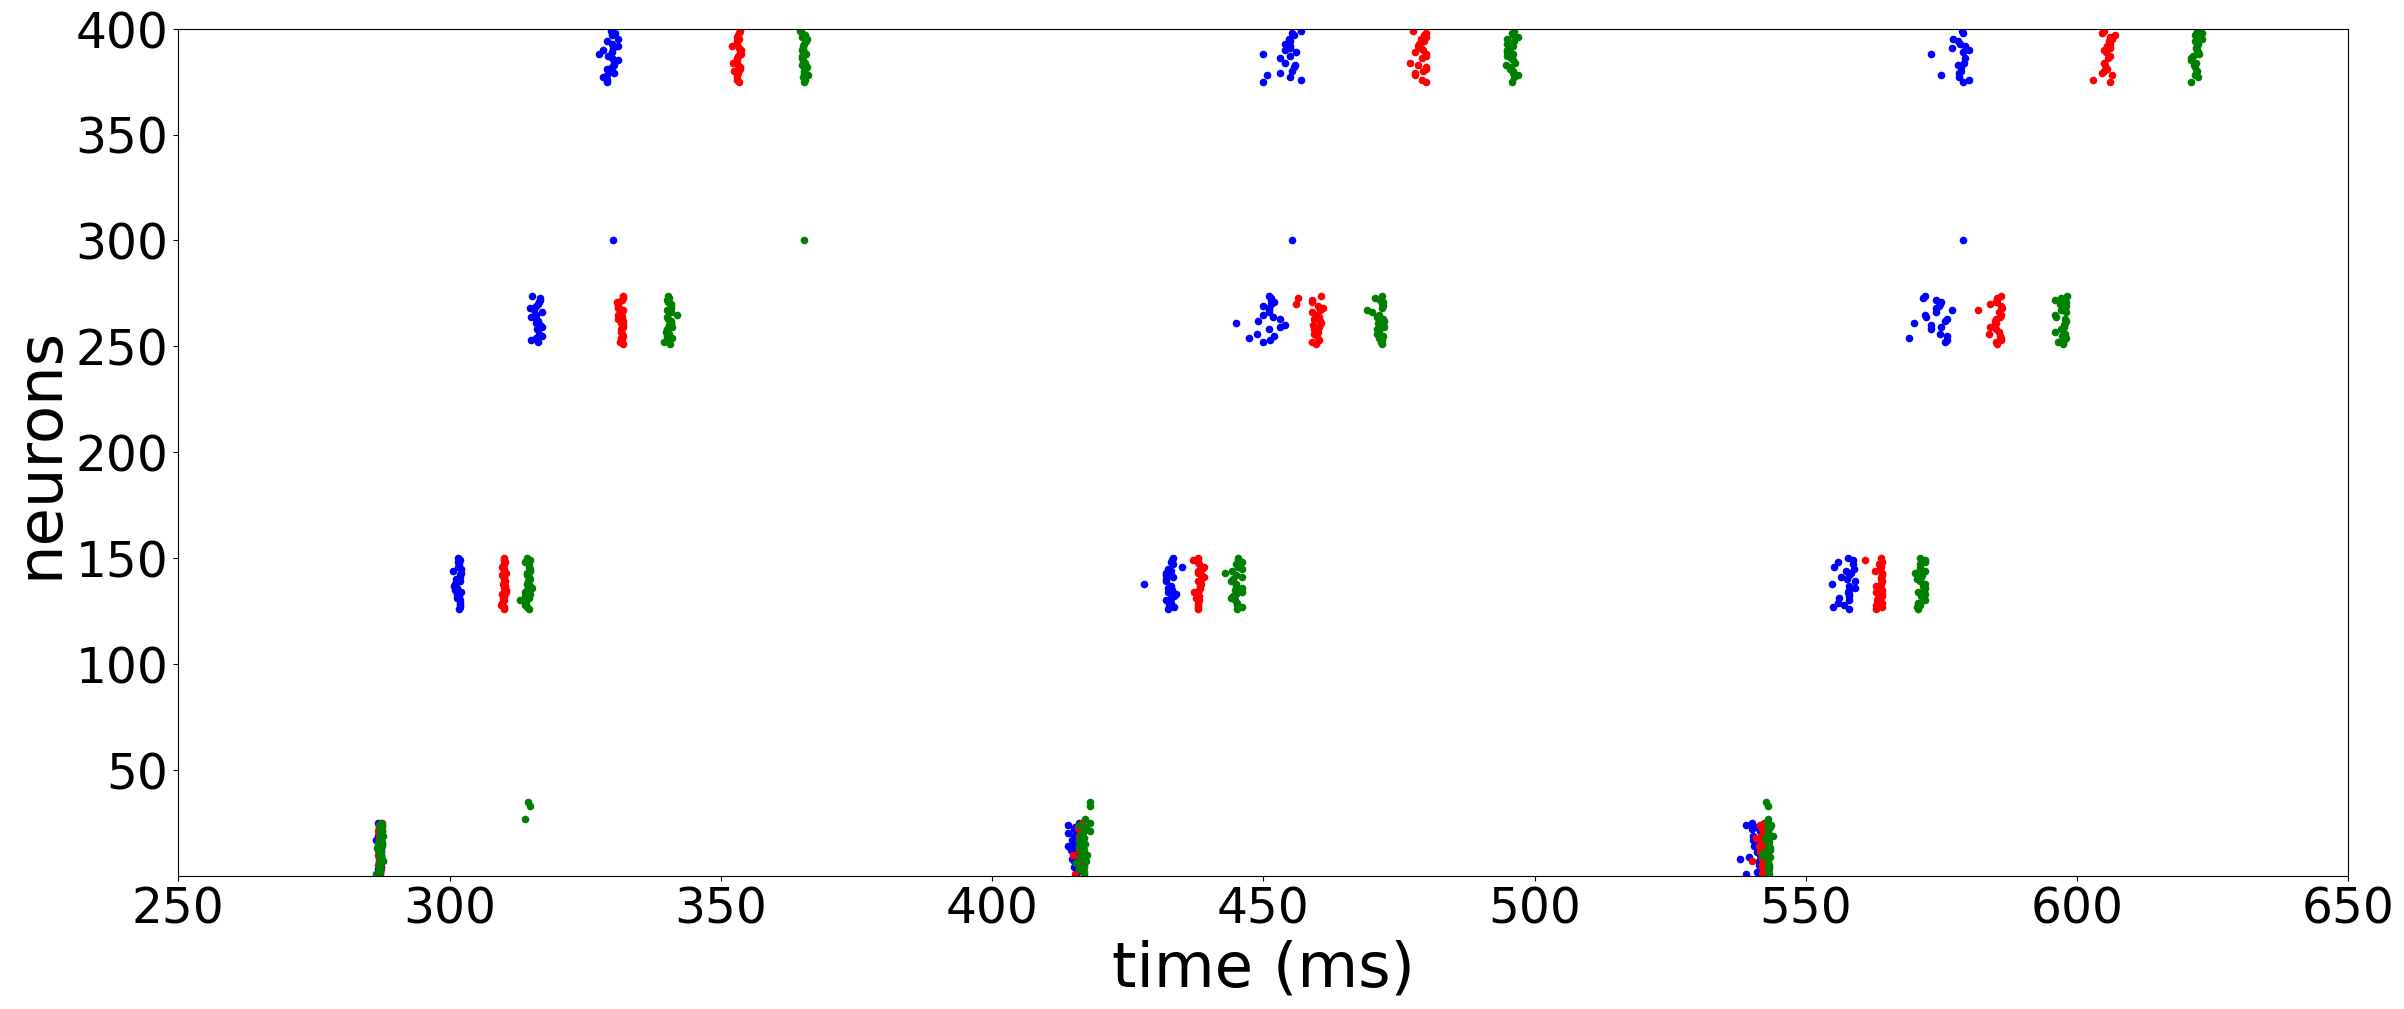

In [16]:
ll1 = [0.5,0.5,0.5]
ll2 = [0.4,0.8,1.2]


plt.figure(figsize = (28,11))


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

ccc = ['b','r','g']

for p in range(3):
  for repp in range(17,18):
    r2= r[(r['phi_i']==ll1[p]) & (r['psi_osc']==ll2[p]) & (r['rep']==repp)]
    t = r2['t']
    who = r2['who']


    plt.ylim(0.01,400)
    plt.scatter(t,who, s = 20, c = ccc[p])
    plt.xlabel('time (ms)', fontsize = 45)
    plt.ylabel('neurons', fontsize = 45)
    plt.tick_params(labelsize = 35)
    plt.xlim(250,650)
    plt.savefig('%i.png' % repp,bbox_inches='tight')

# Figure 5
Contains the physiologic mechanism of firing reactivation and the maintaining phenomena over several cycles.

## Figure 5a
Plot one example of neuronal membrane dynamic, together with its physiological ADP current and input theta current.

<Figure size 640x480 with 0 Axes>

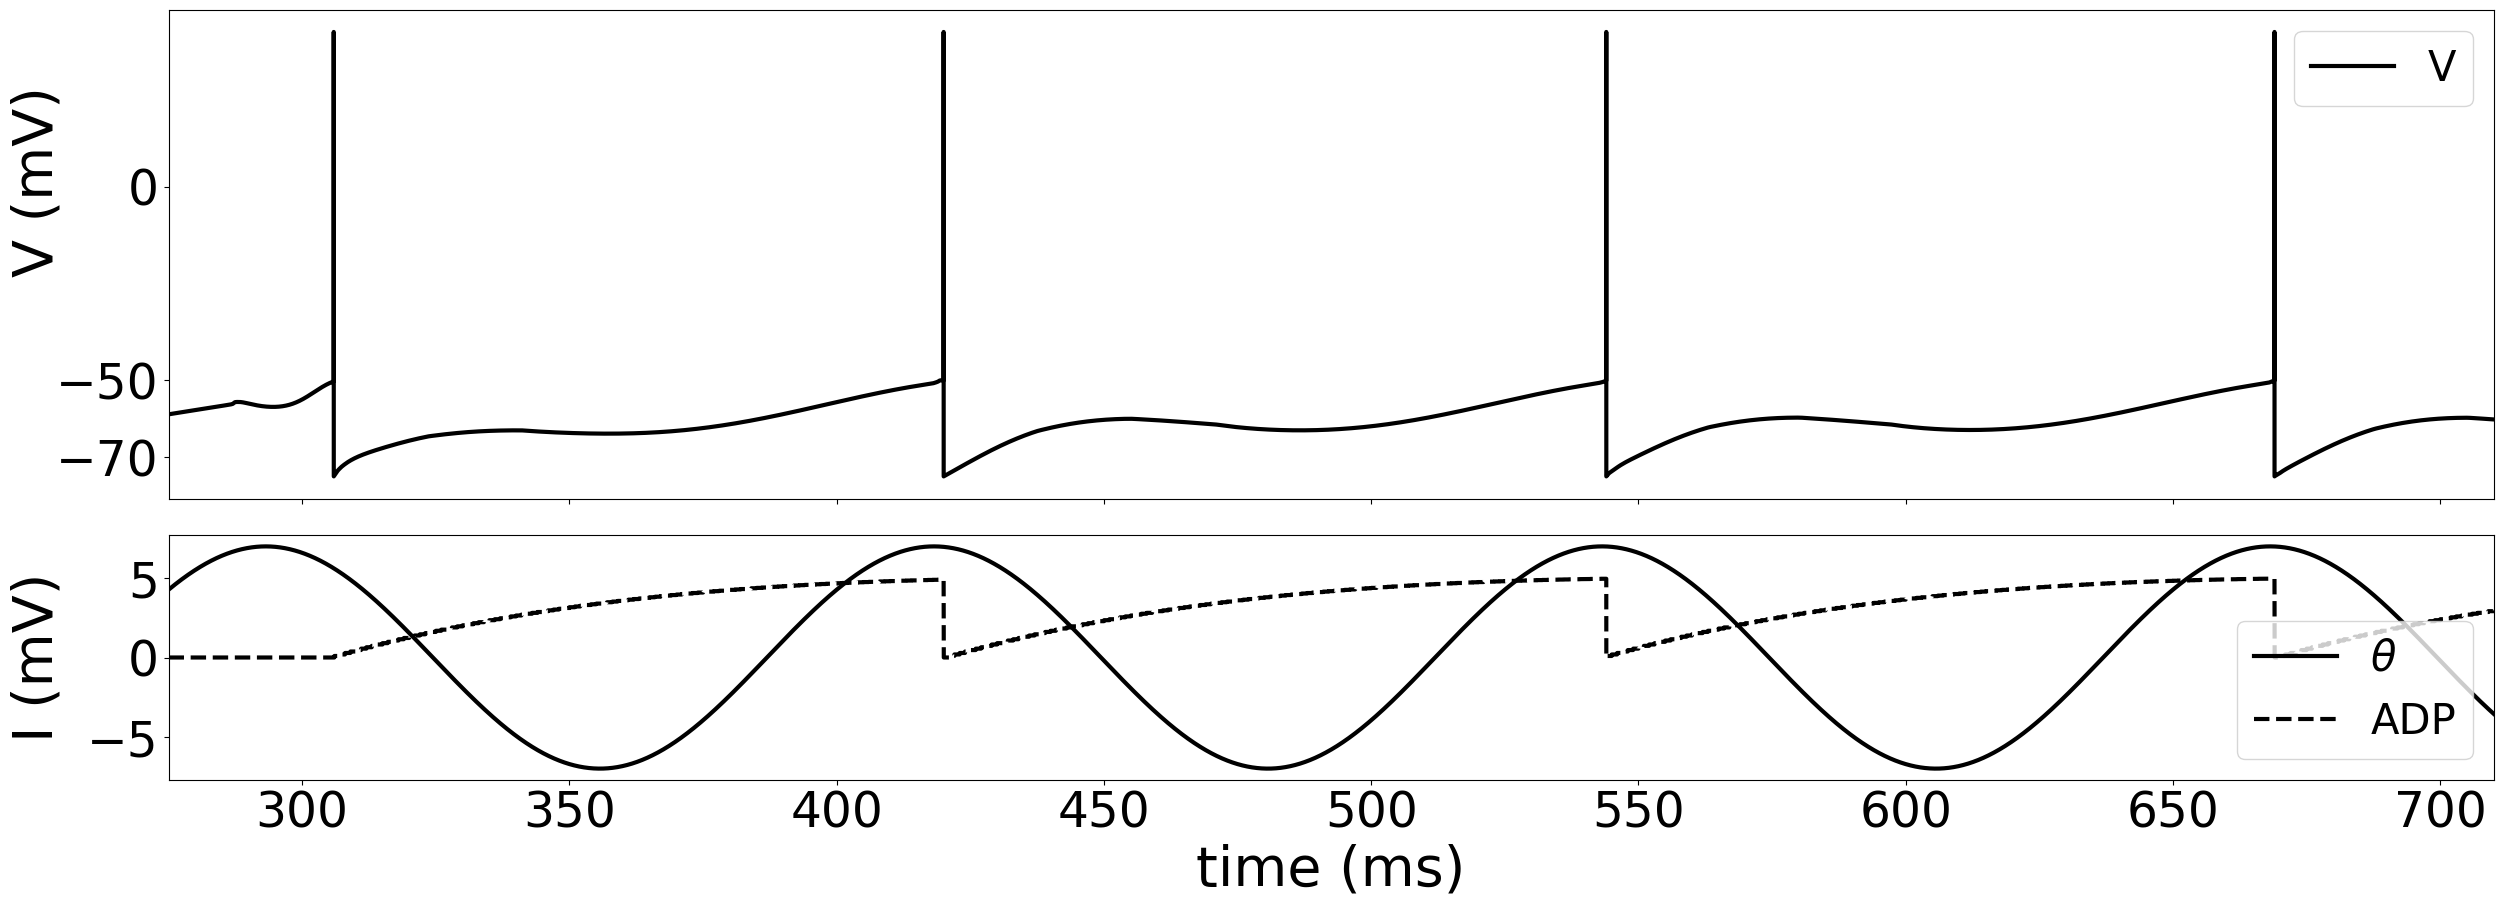

In [17]:
data =pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 4/fig4a.dat', sep = '\t')


ONE_E = data[data['f_inib']== 1800]

#
V = np.array(ONE_E['V'])
t = np.array(ONE_E['t'])
osc = np.array(ONE_E['theta'])
adp = np.array(ONE_E['adp'])
psp = np.array(ONE_E['psp'])
inf = np.array(ONE_E['alfa'])
#

plt.figure()

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0.1,'height_ratios': [2, 1]},figsize=(30,10))

axs[0].set_xlim(275,710)
axs[0].set_yticks([-70,-50,0])
axs[0].tick_params(labelsize = 35)
axs[0].plot(t,V, c = 'k', label = "V", lw = 3)
axs[0].legend(fontsize = 30)
axs[0].set_ylabel('V (mV)', fontsize = 40)
axs[0].yaxis.set_label_coords(1, 1)
axs[1].set_ylabel('I (mV)', fontsize = 40)
axs[1].set_xlabel('time (ms)', fontsize = 40)
axs[1].plot(t,osc, c = 'k', label = r"$\theta$", lw = 3)
#axs[1].set_ylabel('I$_\u03B8$', fontsize = 14)
axs[1].plot(t,adp, c = 'k', linestyle = '--', label = "ADP", lw = 3)

plt.tick_params(labelsize = 35)
plt.legend(fontsize = 30, loc = 'lower right')

axs[0].yaxis.set_label_coords(-0.045, 0.65)
axs[1].yaxis.set_label_coords(-0.045, 0.5)



plt.savefig('334.png',bbox_inches='tight')

## Figure 5b
Shows the maintaining of the items as the proportion of each item that fires correclty and the Os parameter.

In [18]:
lim_inferior = []
lim_superior = []

lim_inferior.append(0)


t=[]
fase=[]
seno=[]


delta_T_ciclo = 30

for tempo in range(180000):
        t.append(tempo/100)
        fase.append(2*np.pi*8*tempo)
        seno.append(np.sin(2*np.pi*8*tempo*0.00001))
        if(seno[tempo]==-1):
            lim_superior.append(t[tempo] + delta_T_ciclo)
            lim_inferior.append(t[tempo] + delta_T_ciclo)

del lim_inferior[-1]

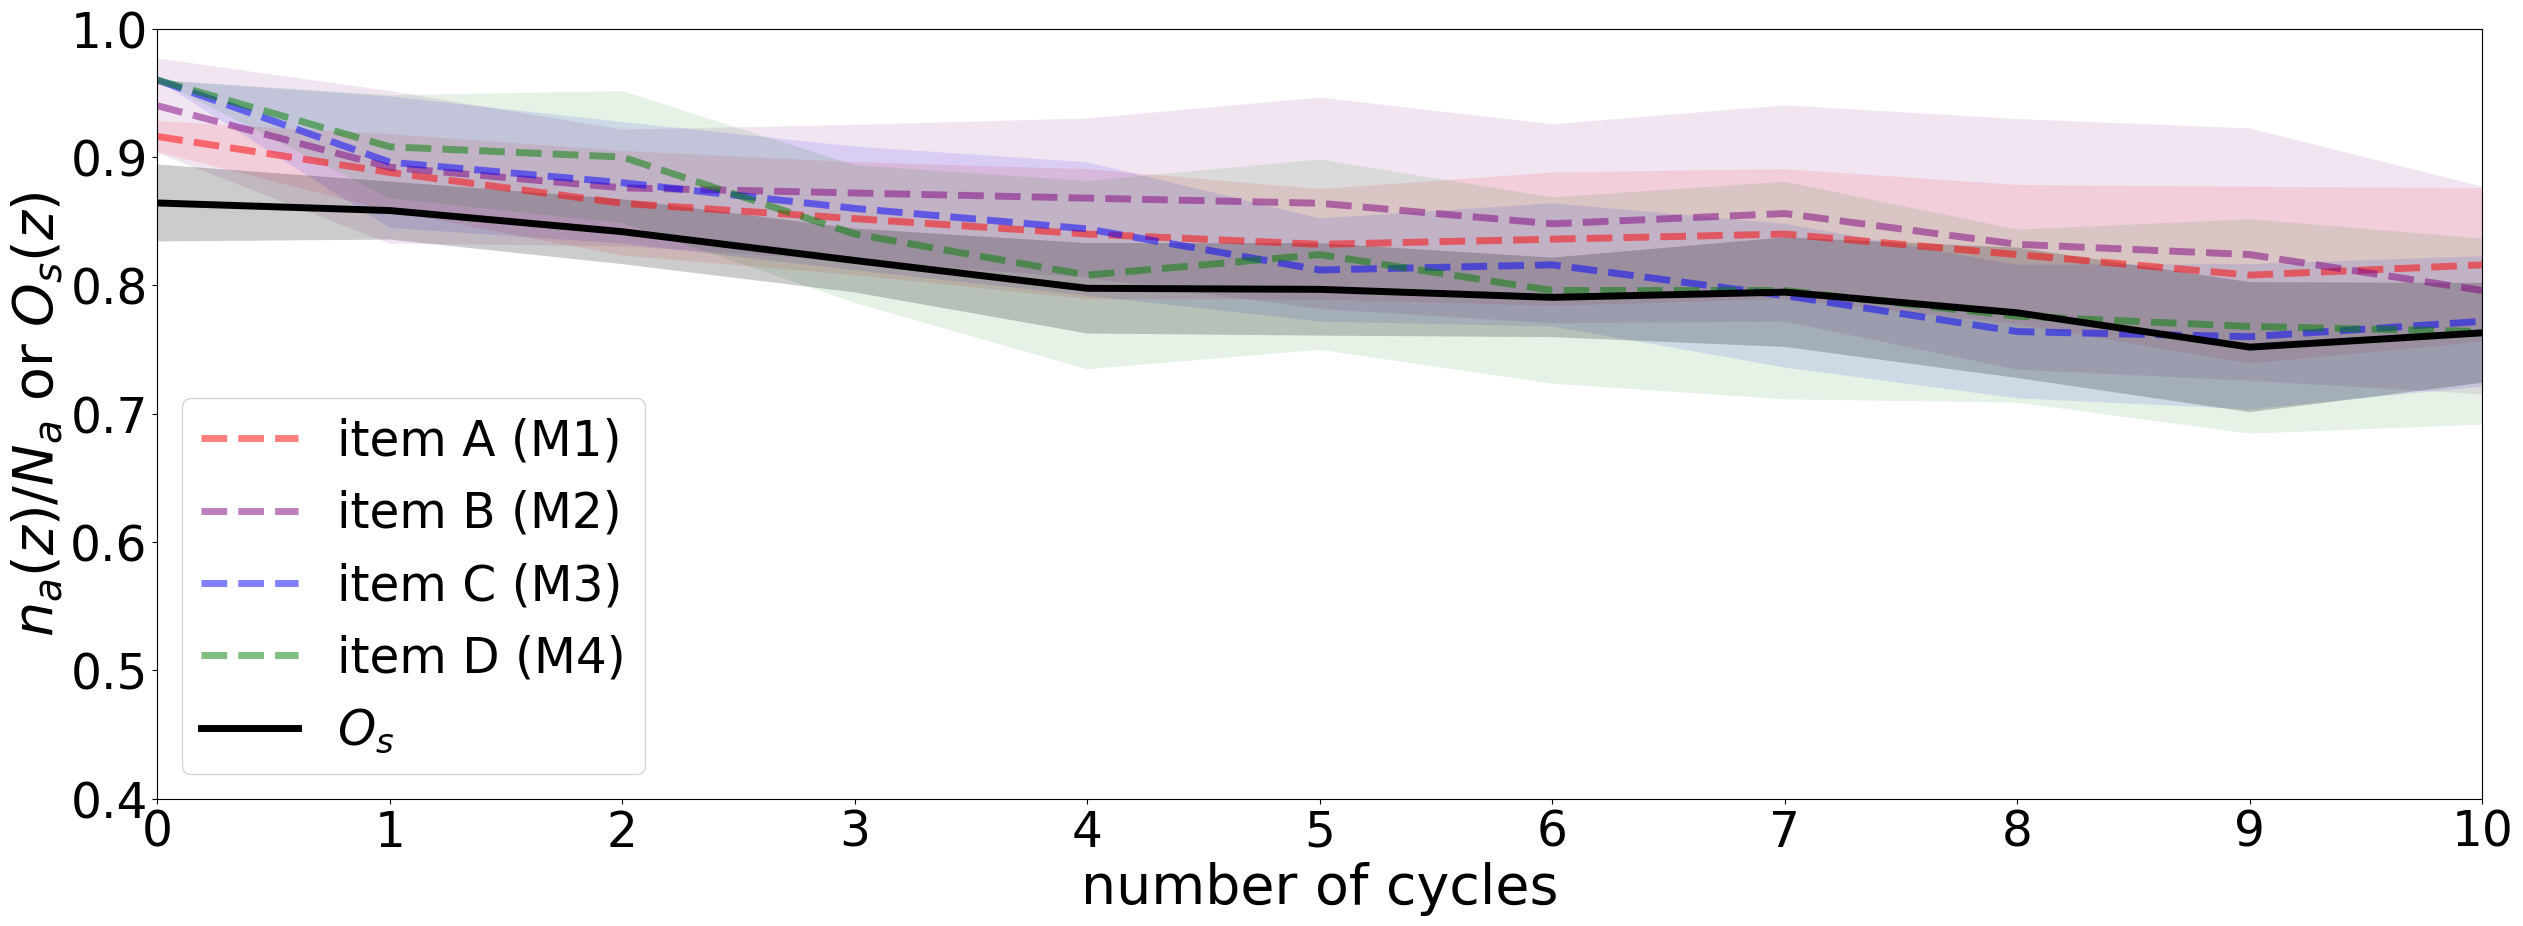

In [19]:
data =pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 4/fig4b.dat', sep = '\t')

num_experimentos = 10

rasterplot   =  data
rasterplot_e = (rasterplot[(rasterplot['who']  < 400)])


experimentos = []


for i in range(1,num_experimentos):
  experimentos.append(rasterplot_e[rasterplot_e['a']== i])



ciclo = [259,362,517,621,750,879,1000,1140,1250,1390,1530,1690]

parameter = [2000]


nrep=10

M_med_i1a, M_med_i1b, M_med_i1c, M_med_i1d = [],[],[],[]
M_med_i2a, M_med_i2b, M_med_i2c, M_med_i2d = [],[],[],[]
M_med_i3a, M_med_i3b, M_med_i3c, M_med_i3d = [],[],[],[]
M_med_i4a, M_med_i4b, M_med_i4c, M_med_i4d = [],[],[],[]

making_1()

for c in range(len(ciclo)-1):
    making_2(med_i1a,med_i1b,med_i1c,med_i1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis)
    making_2(med_i2a,med_i2b,med_i2c,med_i2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis)
    making_2(med_i3a,med_i3b,med_i3c,med_i3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis)
    making_2(med_i4a,med_i4b,med_i4c,med_i4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis)


for rep in range(1,nrep+1):
    making_3()

    for c in range(len(ciclo)-1):
      rasterplot = data[(data['tau']== parameter[0]) & (data['a']==rep)]
      raster_time = np.array(rasterplot['t'])
      raster_who = np.array(rasterplot['who'])

      a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q = quant_itens(raster_time, raster_who,ciclo[c],ciclo[c+1],1)                          #M1
      a1t2,b1t2,c1t2,d1t2,a1q2,b1q2,c1q2,d1q2 = quant_itens(raster_time, raster_who,ciclo[c],ciclo[c+1],2)                   #M2
      a1t23,b1t23,c1t23,d1t23,a1q23,b1q23,c1q23,d1q23 = quant_itens(raster_time, raster_who,ciclo[c],ciclo[c+1],3)           #M3
      a1t234,b1t234,c1t234,d1t234,a1q234,b1q234,c1q234,d1q234 = quant_itens(raster_time, raster_who,ciclo[c],ciclo[c+1],4)   #M4

      making_4(a1q,   b1q,   c1q,   d1q,      item_1a,item_1b,item_1c,item_1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis,c)
      making_4(a1q2,  b1q2,  c1q2,  d1q2,     item_2a,item_2b,item_2c,item_2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis,c)
      making_4(a1q23, b1q23, c1q23, d1q23,    item_3a,item_3b,item_3c,item_3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis,c)
      making_4(a1q234,b1q234,c1q234,d1q234,   item_4a,item_4b,item_4c,item_4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis,c)

    M_med_i1a.append(item_1a)
    M_med_i1b.append(item_1b)
    M_med_i1c.append(item_1c)
    M_med_i1d.append(item_1d)

    M_med_i2a.append(med_i2a)
    M_med_i2b.append(med_i2b)
    M_med_i2c.append(med_i2c)
    M_med_i2d.append(med_i2d)

    M_med_i3a.append(med_i3a)
    M_med_i3b.append(med_i3b)
    M_med_i3c.append(med_i3c)
    M_med_i3d.append(med_i3d)

    M_med_i4a.append(med_i4a)
    M_med_i4b.append(med_i4b)
    M_med_i4c.append(med_i4c)
    M_med_i4d.append(med_i4d)

    making_5(med_i1a,med_i1b,med_i1c,med_i1d,item_1a,item_1b,item_1c,item_1d, ciclo)
    making_5(med_i2a,med_i2b,med_i2c,med_i2d,item_2a,item_2b,item_2c,item_2d, ciclo)
    making_5(med_i3a,med_i3b,med_i3c,med_i3d,item_3a,item_3b,item_3c,item_3d, ciclo)
    making_5(med_i4a,med_i4b,med_i4c,med_i4d,item_4a,item_4b,item_4c,item_4d, ciclo)


making_6(med_i1a, med_i1b, med_i1c, med_i1d, ciclo, nrep)
making_6(med_i2a, med_i2b, med_i2c, med_i2d, ciclo, nrep)
making_6(med_i3a, med_i3b, med_i3c, med_i3d, ciclo, nrep)
making_6(med_i4a, med_i4b, med_i4c, med_i4d, ciclo, nrep)


def std(i1a_statis,i1b_statis,i1c_statis,i1d_statis, param):

  P= 0.75

  std_1a=[]
  std_1b=[]
  std_1c=[]
  std_1d=[]

  p1a=[]
  p1b=[]
  p1c=[]
  p1d=[]

  params = param


  for i in range(len(params)-1):
    a1 = np.array(i1a_statis[i])
    a1 = np.transpose(a1)
    std_1a.append(np.std(a1[i]))








  for i in range(len(params)-1):
    b1 = np.array(i1b_statis[i])
    b1 = np.transpose(b1)
    std_1b.append(np.std(b1[i]))







  for i in range(len(params)-1):
    c1 = np.array(i1c_statis[i])
    c1 = np.transpose(c1)
    std_1c.append(np.std(c1[i]))






  for i in range(len(params)-1):
    d1 = np.array(i1d_statis[i])
    d1 = np.transpose(d1)

    std_1d.append(np.std(d1[i]))






  return std_1a,std_1b,std_1c,std_1d,p1a,p1b,p1c,p1d




std_1a,std_1b,std_1c,std_1d,p1a,p1b,p1c,p1d = std(i1a_statis,i1b_statis,i1c_statis,i1d_statis,ciclo)
std_2a,std_2b,std_2c,std_2d,p2a,p2b,p2c,p2d = std(i2a_statis,i2b_statis,i2c_statis,i2d_statis,ciclo)
std_3a,std_3b,std_3c,std_3d,p3a,p3b,p3c,p3d = std(i3a_statis,i3b_statis,i3c_statis,i3d_statis,ciclo)
std_4a,std_4b,std_4c,std_4d,p4a,p4b,p4c,p4d = std(i4a_statis,i4b_statis,i4c_statis,i4d_statis,ciclo)


#########
ciciclo = [259,362,517,621,750,879,1000,1140,1250,1390,1530,1690]
EE = []
TT = []

EE.append([])
TT.append([])

lim_Ei = [0,101,201,301]
lim_Es = [101,201,301,401]

beta = 1
cfim = 14
ciclos = np.linspace(0,cfim,cfim-1)


delta_t = 20

EXPS = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
Occ = []
for exp2 in range(1,num_experimentos):

        exp = int(exp2)
        EE.append([])
        TT.append([])
        i = exp
        EE[exp]= [[],[],[],[]]
        TT[exp] = [[],[],[],[]]
        for ensemble in range(4):
            for ciclo in range(cfim):
                a = experimentos[exp-1]
                a = a[(a['t'] > lim_inferior[ciclo]) & (a['t'] < lim_superior[ciclo])]
                a = a[(a['who'] > lim_Ei[ensemble]) & (a['who'] < lim_Es[ensemble])]
                EE[exp][ensemble].append(a['t'])
                TT[exp][ensemble].append(a['who'])








        Os =np.zeros(shape=(4,cfim))

        for ensemble in range(4):
            for cicle in range(cfim):

                fired = []
                for who in TT[exp][ensemble][cicle]:
                    if who not in fired:
                        fired.append(who)

                how_many_fired = len(fired)

                aux  = (how_many_fired/25)*(1 - (np.sqrt(2)*np.std(EE[exp][ensemble][cicle])/(delta_t))**(beta))
                if aux > 0:
                    Os[ensemble][cicle] = aux
                elif aux > 1:
                    Os[ensemble][cicle] = 1
                else:
                    Os[ensemble][cicle] = 0

        Os_mean = []

        for cicle in range(cfim):
          aux = 0
          for ensemble in range(4):
              aux += Os[ensemble][cicle]
          Os_mean.append(aux/4)


        Oa = np.zeros(shape=(cfim,10))

        for cicle in range(cfim):
            combinacao= -1
            for grupo1 in range(4):
                for grupo2 in range(grupo1,4):
                    if grupo1 != grupo2:
                        combinacao += 1
                        aux = abs(np.mean((EE[exp][grupo1][cicle])) - np.mean((EE[exp][grupo2][cicle])))/delta_t
                        if aux > 1:
                            Oa[cicle][combinacao] = 1
                        elif math.isnan(aux) == True:
                            Oa[cicle][combinacao] = 0
                        else:
                            Oa[cicle][combinacao] = aux


        Oa_mean = []

        for cicle in range(cfim):
            Oa_mean.append((2/(4*(4-1)))*np.sum(Oa[cicle][:]))

        Oc = []


        for i in range(cfim):#cicle tbm
            Oc.append(Os_mean[i]*Oa_mean[i])
        #print(Oc)
        Occ.append(Oc)





OCC = np.array(Occ)
OCCT = OCC.T
ocf = []
ocfdp = []

for i in range(len(OCCT)):
  ocf.append(np.mean(OCCT[i]))
  ocfdp.append(np.std(OCCT[i]))


cfim = 11

########################
fig, ax = plt.subplots(1,1, figsize = (30,10))


ax.plot(np.linspace(0,cfim-1, cfim),np.array(med_i1a)*4/100, c= 'r', label = "item A (M1)",lw=5,ls = '--', alpha = 0.5)
ax.plot(np.linspace(0,cfim-1, cfim),np.array(med_i2b)*4/100, c= 'purple', label = "item B (M2)",lw=5,ls = '--', alpha = 0.5)
ax.plot(np.linspace(0,cfim-1, cfim),np.array(med_i3c)*4/100, c= 'b', label = "item C (M3)",lw=5,ls = '--', alpha = 0.5)
ax.plot(np.linspace(0,cfim-1, cfim),np.array(med_i4d)*4/100, c= 'g', label = "item D (M4)",lw=5,ls = '--', alpha = 0.5)



ax.fill_between(np.linspace(0,cfim-1, cfim), np.array(med_i1a)*4/100+np.array(std_1a)*4/100, np.array(med_i1a)*4/100-np.array(std_1a)*4/100, facecolor='red', alpha=0.1)
ax.fill_between(np.linspace(0,cfim-1, cfim), np.array(med_i2b)*4/100+np.array(std_2b)*4/100, np.array(med_i2b)*4/100-np.array(std_2b)*4/100, facecolor='purple', alpha=0.1)
ax.fill_between(np.linspace(0,cfim-1, cfim), np.array(med_i3c)*4/100+np.array(std_3c)*4/100, np.array(med_i3c)*4/100-np.array(std_3c)*4/100, facecolor='blue', alpha=0.1)
ax.fill_between(np.linspace(0,cfim-1, cfim), np.array(med_i4d)*4/100+np.array(std_4d)*4/100, np.array(med_i4d)*4/100-np.array(std_4d)*4/100, facecolor='green', alpha=0.1)






ax.set_xlabel("number of cycles", fontsize = 40)
ax.set_ylabel(r"$n_a(z)/N_a$ or $O_s(z)$",fontsize = 40)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])

ax.set_xlim(0,10)
ax.set_ylim(0.4,1)

ax.plot(np.linspace(0,cfim-1, cfim),ocf[2:-1], c= 'k', label = r"$O_s$",lw=5)
ax.fill_between(np.linspace(0,cfim-1, cfim), np.array(ocf[2:-1])-np.array(ocfdp[2:-1]), np.array(ocf[2:-1])+np.array(ocfdp[2:-1]), facecolor='k', alpha=0.2)


#ax.hlines(0.76,0,10)

ax.tick_params(labelsize = 35)

ax.legend(loc= 'lower left', fontsize = 35)






# Figure 6
Figure 5 shows de memory erasing plots.

## Figure 6a
Analytical plot of an theta (blue) and alpha (orange) sin(t) function.

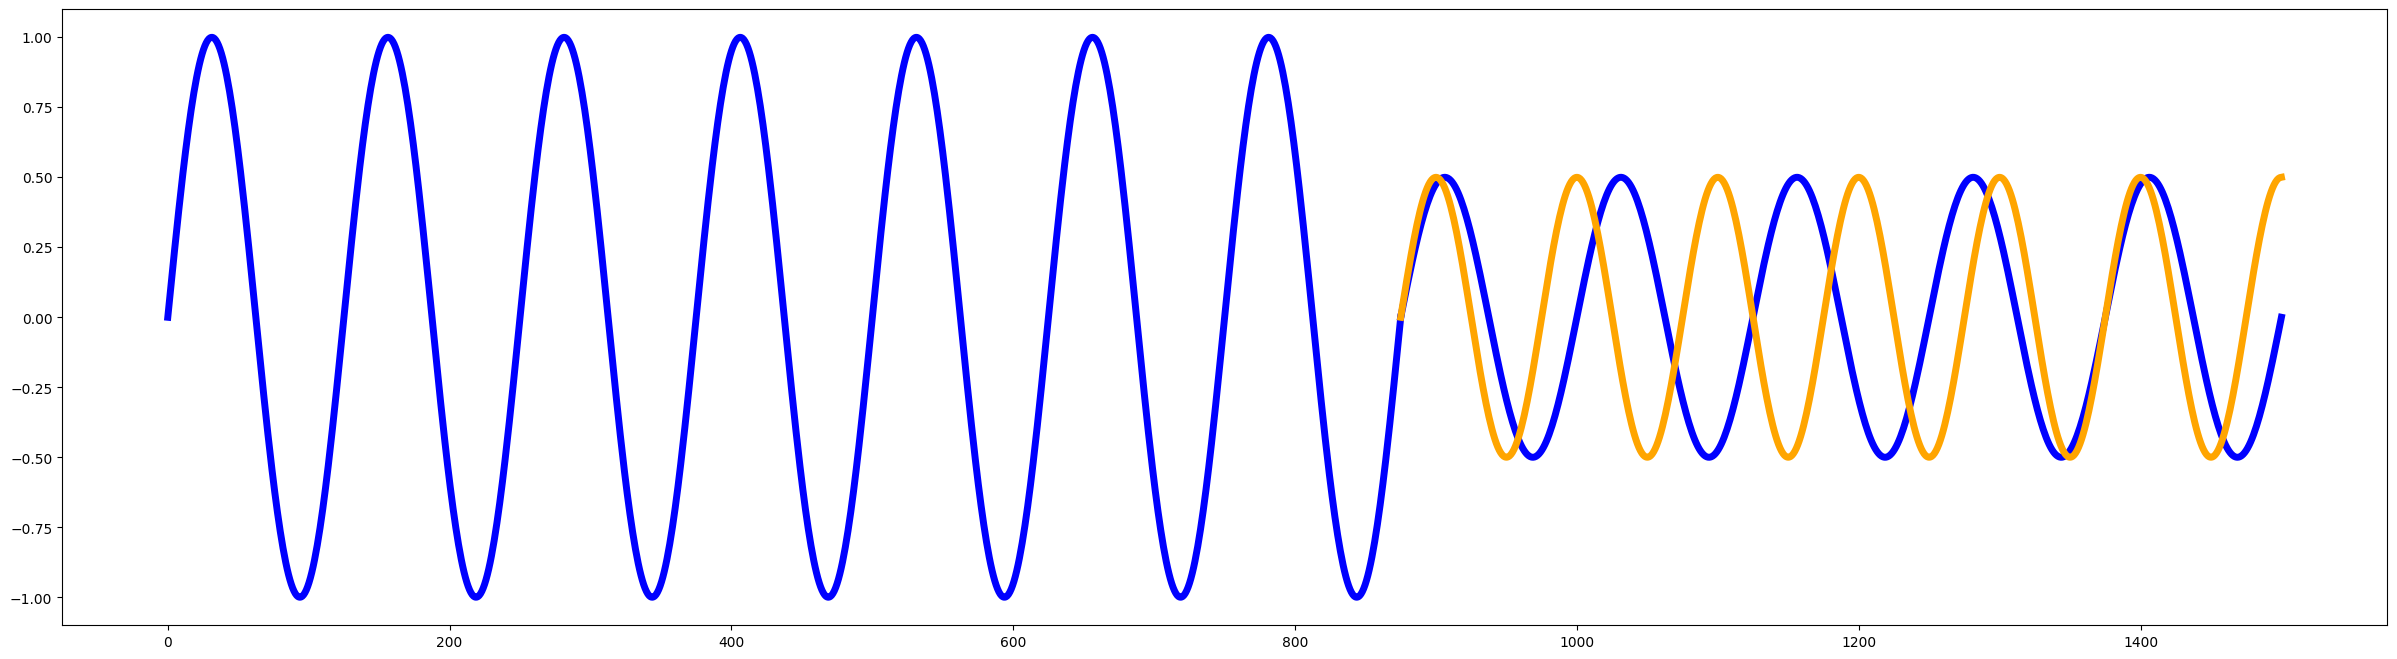

In [20]:
t_alfa = 875

amplitude = 0.5


T1 = np.linspace(0,t_alfa,900)
S1 = np.sin(2*np.pi*0.001*T1*8)


T11 = np.linspace(t_alfa,1500, 600)
S11 = amplitude*np.sin(2*np.pi*0.001*T11*8)


T2 = np.linspace(t_alfa,1500,600)
S2 = amplitude*np.sin(2*np.pi*0.001*(T2-t_alfa)*10 + 2*np.pi*0.001*t_alfa*8)


plt.figure(figsize = (30,8))
plt.plot(T1,S1, lw = 5, c = 'b')
plt.plot(T11,S11, lw = 5, c = 'b')
plt.plot(T2,S2, lw = 5, c = 'orange')

## Figure 6b
Shows the probability of erase in relation to 3 variables. The first plot has a lot of intermediary data processing.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.01, 1.01)

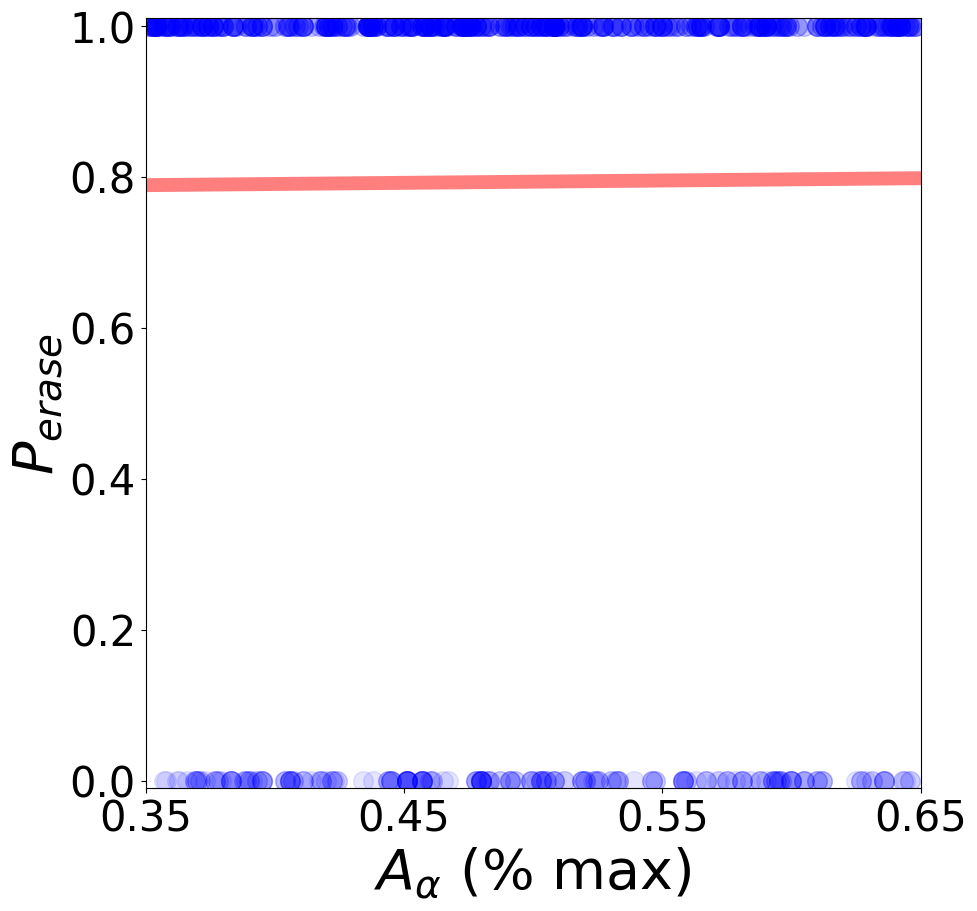

In [21]:

rr_1 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n1.dat', sep = '\t')
rr_2 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n2.dat', sep = '\t')
rr_3 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n3.dat', sep = '\t')
rr_4 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n4.dat', sep = '\t')
rr_5 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n5.dat', sep = '\t')
rr_6 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n6.dat', sep = '\t')
rr_7 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n7.dat', sep = '\t')
rr_8 = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure 5/n8.dat', sep = '\t')

r_1 = pd.concat([rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8])


lim_inferior = []
lim_superior = []

lim_inferior.append(0)


t=[]
fase=[]
seno=[]


delta_T_ciclo = 30


for tempo in range(180000):
        t.append(tempo/100)
        fase.append(2*np.pi*8*tempo)
        seno.append(np.sin(2*np.pi*8*tempo*0.00001))
        if(seno[tempo]==-1):
            lim_superior.append(t[tempo] + delta_T_ciclo)
            lim_inferior.append(t[tempo] + delta_T_ciclo)

del lim_inferior[-1]



a1 = []
a2 = []
a3 = []

num_experimentos = 401


rasterplot   =  r_1
rasterplot_e = (rasterplot[(rasterplot['who']  < 400)])


experimentos = []

for i in range(1,num_experimentos):
  experimentos.append(rasterplot_e[rasterplot_e['REPP']== i])


EE = []
TT = []

EE.append([])
TT.append([])

lim_Ei = [0,101,201,301]
lim_Es = [101,201,301,401]

beta = 1
ciclos = np.linspace(0,13,14)


delta_t = 20

EXPS = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for exp2 in range(1,num_experimentos):

        exp = int(exp2)
        EE.append([])
        TT.append([])
        i = exp
        EE[exp]= [[],[],[],[]]
        TT[exp] = [[],[],[],[]]
        for ensemble in range(4):
            for ciclo in range(14):
                a = experimentos[exp-1]
                a = a[(a['t'] > lim_inferior[ciclo]) & (a['t'] < lim_superior[ciclo])]
                a = a[(a['who'] > lim_Ei[ensemble]) & (a['who'] < lim_Es[ensemble])]
                EE[exp][ensemble].append(a['t'])
                TT[exp][ensemble].append(a['who'])








        Os =np.zeros(shape=(4,14))

        for ensemble in range(4):
            for cicle in range(14):

                fired = []
                for who in TT[exp][ensemble][cicle]:
                    if who not in fired:
                        fired.append(who)

                how_many_fired = len(fired)

                aux  = (how_many_fired/25)*(1 - (np.sqrt(2)*np.std(EE[exp][ensemble][cicle])/(delta_t))**(beta))
                if aux > 0:
                    Os[ensemble][cicle] = aux
                elif aux > 1:
                    Os[ensemble][cicle] = 1
                else:
                    Os[ensemble][cicle] = 0

        Os_mean = []

        for cicle in range(14):
          aux = 0
          for ensemble in range(4):
              aux += Os[ensemble][cicle]
          Os_mean.append(aux/4)


        Oa = np.zeros(shape=(14,10))

        for cicle in range(14):
            combinacao= -1
            for grupo1 in range(4):
                for grupo2 in range(grupo1,4):
                    if grupo1 != grupo2:
                        combinacao += 1
                        aux = abs(np.mean((EE[exp][grupo1][cicle])) - np.mean((EE[exp][grupo2][cicle])))/delta_t
                        if aux > 1:
                            Oa[cicle][combinacao] = 1
                        elif math.isnan(aux) == True:
                            Oa[cicle][combinacao] = 0
                        else:
                            Oa[cicle][combinacao] = aux


        Oa_mean = []

        for cicle in range(14):
            Oa_mean.append((2/(4*(4-1)))*np.sum(Oa[cicle][:]))

        Oc = []
        for i in range(14):
            Oc.append(Os_mean[i]*Oa_mean[i])

            EXPS[i].append([[Oc[i]],[experimentos[exp-1]['a'].unique()],[experimentos[exp-1]['delay'].unique()],[experimentos[exp-1]['tau'].unique()],[experimentos[exp-1]['REPP'].unique()]])





for KK in [8,9,10]:
  ciclo = KK
  aa = []
  bb = []
  cc = []
  dd = []
  for i in range(num_experimentos-2):
    for k in EXPS[ciclo][i][3]:
      #print(i,k)
      aa.append(float(k))
    for k in EXPS[ciclo][i][2]:
      bb.append(float(k))
    for k in EXPS[ciclo][i][1]:
      cc.append(float(k))
    for k in EXPS[ciclo][i][0]:
      dd.append(float(k))

  df = pd.DataFrame({'t':aa,'amp':bb,'f':cc,'si':dd})


  a1.append([[],[]])

  a2.append([[],[]])

  a3.append([[],[]])

  K = KK-8

  df_T = df['t']*(2*np.pi*8*0.00001)
  df_T = np.remainder(df_T, 2*np.pi)
  df_T = df_T/np.pi

  for i in range(len(np.array(df_T))):
    if (df['si'][i] > -0.2):
      a1[K][0].append(df['amp'][i])
      a1[K][1].append(df['si'][i])

      a2[K][0].append(df_T[i])
      a2[K][1].append(df['si'][i])


      a3[K][0].append(df['f'][i])
      a3[K][1].append(df['si'][i])




aa1 = a1[0][0] + a1[1][0] + a1[2][0]
aa2 = a1[0][1] + a1[1][1] + a1[2][1]

baa1 = a2[0][0] + a2[1][0] + a2[2][0]
baa2 = a2[0][1] + a2[1][1] + a2[2][1]

caa1 = a3[0][0] + a3[1][0] + a3[2][0]
caa2 = a3[0][1] + a3[1][1] + a3[2][1]




s1 = 40
s2 = 4



###
aa1b = []
ampb = []
for i in range(len(aa1)):
  if (aa2[i]> 0.5):
    aa1b.append(0)
  else:
    aa1b.append(1)
  ampb.append(aa1[i])


ampb = np.array(ampb).reshape(-1,1)
aa1b = np.array(aa1b).reshape(-1,1)

x = np.linspace(0.35,0.65,1000)
reg = LogisticRegression().fit(np.array(ampb), np.array(aa1b))


plt.figure(figsize = (10,10))
plt.scatter(ampb,aa1b,s=200, c = 'blue', alpha = 0.1)
plt.plot(x,np.exp((reg.intercept_[0] + reg.coef_[0]*x))/(1+np.exp((reg.intercept_[0] + reg.coef_[0]*x))), c = 'red', lw = 10, alpha = 0.5)
plt.ylabel(r"$P_{erase}$", fontsize = 40)
plt.xlabel(r"$A_\alpha$ ($\%$ max)", fontsize = 40)
plt.tick_params(labelsize = 30)
#plt.yticks([0,0.2,0.4,0.6,0.8,1.0], labels = [])
#plt.yticklabels([])
plt.xticks([0.35,0.45,0.55,0.65])

plt.xlim(0.35,0.65)
plt.ylim(-0.01,1.01)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.01, 1.01)

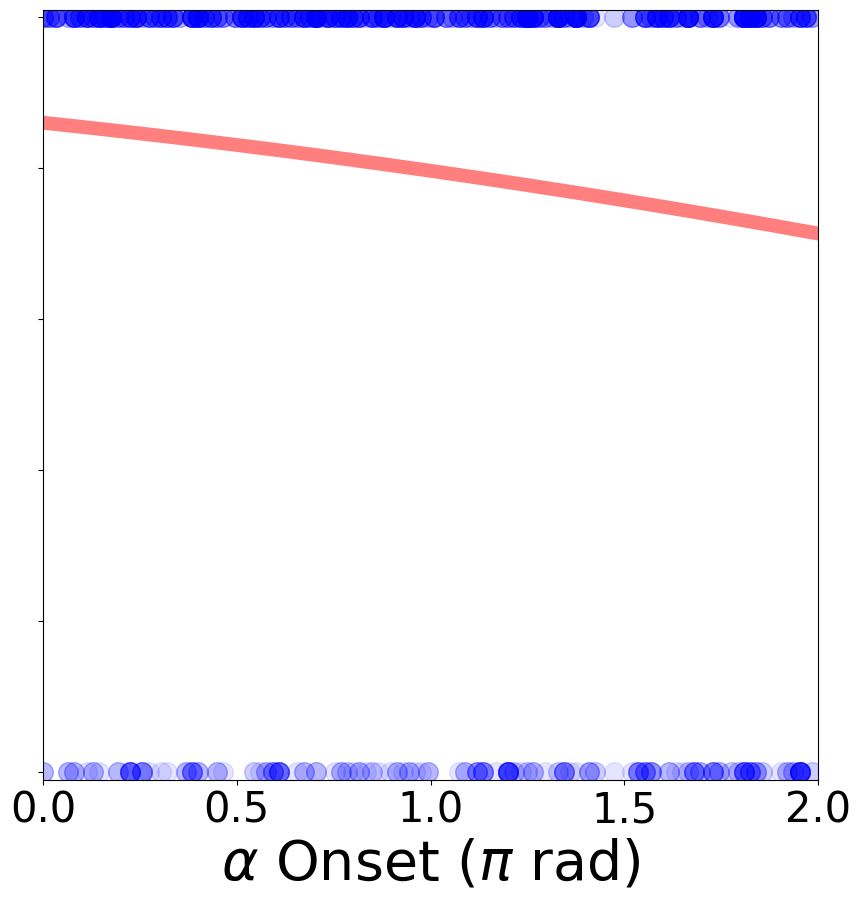

In [22]:
aa1b = []
ampb = []
for i in range(len(baa1)):
  if (baa2[i]> 0.5):
    aa1b.append(0)
  else:
    aa1b.append(1)
  ampb.append(baa1[i])


ampb = np.array(ampb).reshape(-1,1)
aa1b = np.array(aa1b).reshape(-1,1)

x = np.linspace(0,2,1000)
reg = LogisticRegression().fit(np.array(ampb), np.array(aa1b))

plt.figure(figsize = (10,10))
plt.scatter(ampb,aa1b,s=200, c = 'blue', alpha = 0.1)
plt.plot(x,np.exp((reg.intercept_[0] + reg.coef_[0]*x))/(1+np.exp((reg.intercept_[0] + reg.coef_[0]*x))), c = 'red', lw = 10, alpha = 0.5)
#plt.ylabel(r"$P_{clear}$", fontsize = 40)
plt.xlabel(r"$\alpha$ Onset ($\pi$ rad)", fontsize = 40)
plt.tick_params(labelsize = 30)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0], labels = [])
#plt.yticklabels([])

plt.xlim(0,2)
plt.ylim(-0.01,1.01)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.01, 1.01)

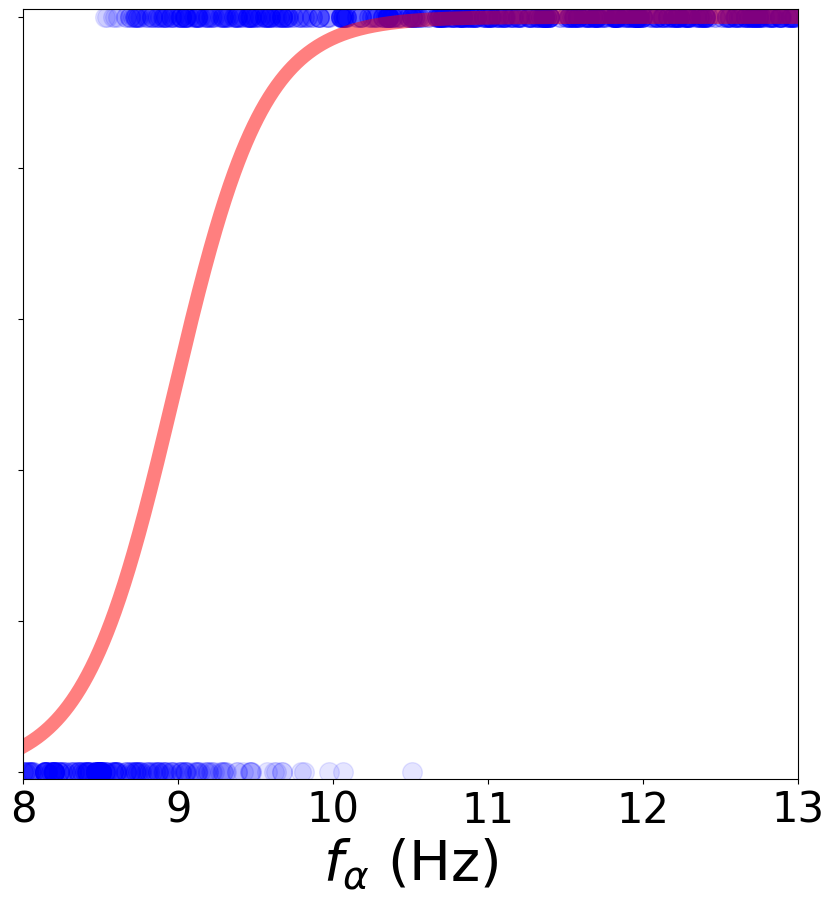

In [23]:
aa1b = []
ampb = []
for i in range(len(caa1)):
  if (caa2[i]> 0.5):
    aa1b.append(0)
  else:
    aa1b.append(1)
  ampb.append(caa1[i])

x = np.linspace(8,13,1000)

ampb = np.array(ampb).reshape(-1,1)
aa1b = np.array(aa1b).reshape(-1,1)

reg = LogisticRegression().fit(np.array(ampb), np.array(aa1b))

plt.figure(figsize = (10,10))
plt.scatter(ampb,aa1b,s=200, c = 'blue', alpha = 0.1)
plt.plot(x,np.exp((reg.intercept_[0] + reg.coef_[0]*x))/(1+np.exp((reg.intercept_[0] + reg.coef_[0]*x))), c = 'red', lw = 10, alpha = 0.5)
#plt.ylabel(r"$P_{clear}$", fontsize = 40)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0], labels = [])
plt.xlabel(r"$f_\alpha$ (Hz)", fontsize = 40)
plt.tick_params(labelsize = 30)

plt.xlim(8,13)
plt.ylim(-0.01,1.01)

# Figure 7
Figure 7 is an analytical plot that illustrates the CLEAR phenomena as a match between the lows of the beat generated by the interference and the peak of the ADP current.

<ipython-input-3-704f5bb8260f>:37: RuntimeWarning: divide by zero encountered in true_divide
  axs.plot(5000/(np.abs(8-x)),x, c = 'gray', lw = 3, alpha = 0.8, ls = '--', label =r"$\tau_{min}(f_\alpha)$")


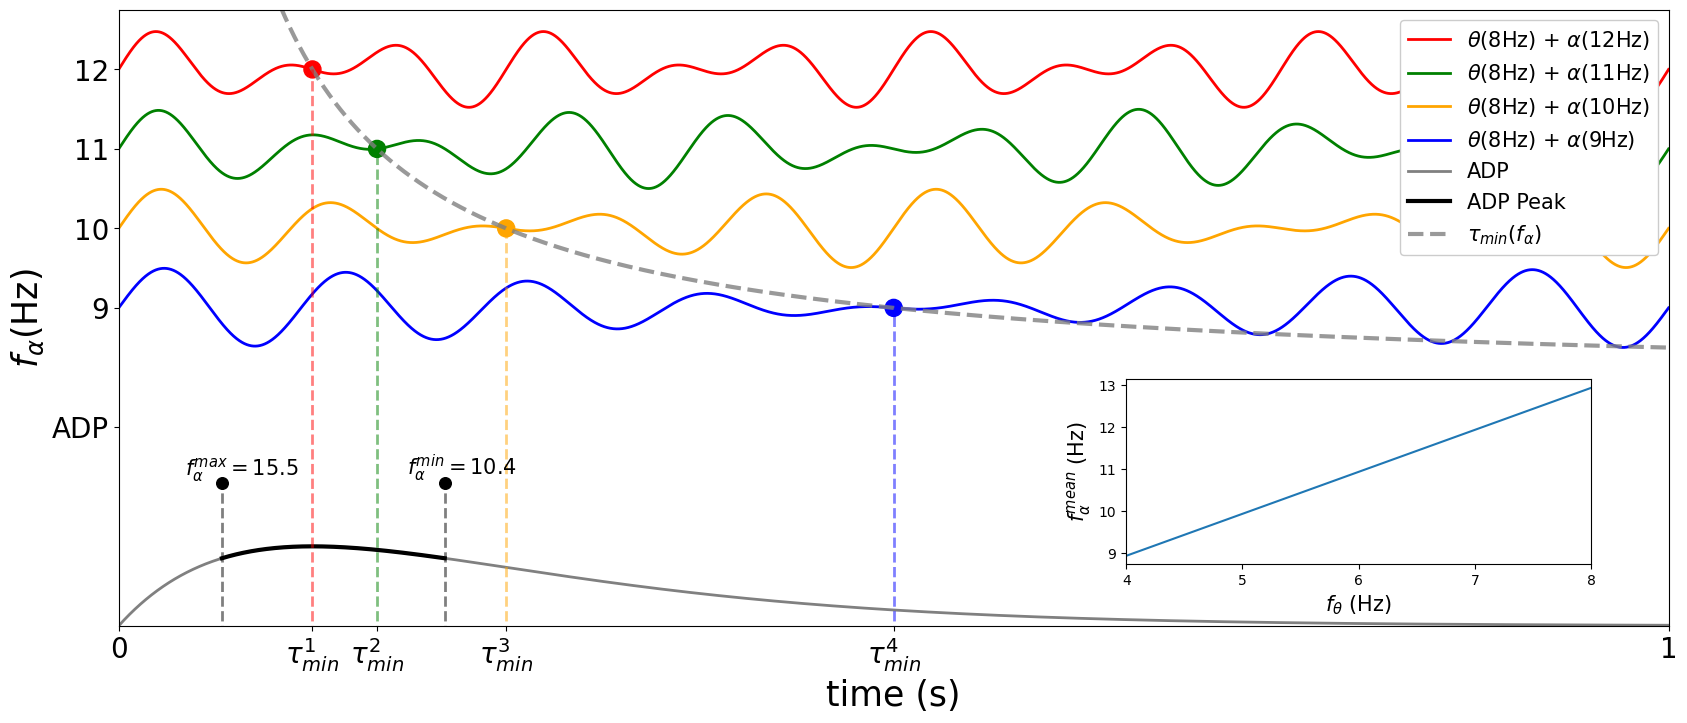

In [3]:
t = np.linspace(0,100,10000)
dt = 0.01
theta = np.sin(2*np.pi*8*t*dt)*0.25
alpha1 = np.sin(2*np.pi*9*t*dt)*0.25
alpha2 = np.sin(2*np.pi*10*t*dt)*0.25
alpha3 = np.sin(2*np.pi*11*t*dt)*0.25
alpha4 = np.sin(2*np.pi*12*t*dt)*0.25

t0 = 0
tau_adp = 125

t1 = np.linspace(0,100000,100000)
dtt= 10
ADP = (1/tau_adp)*(t*dtt-np.array(t0)*dtt)*np.exp(-((t*dtt-np.array(t0)*dtt)/tau_adp)+1)
ADPA = np.array(ADP)
adp70i = np.where(ADPA>0.85)
adp70 = ADPA[ADPA>1*0.85]

fmin = []
fmax = []
for thetaf in (4,5,6,7,8):
  fmin.append(500/(adp70i[0][0]*0.1)+thetaf)
  fmax.append(500/(adp70i[0][-1]*0.1)+thetaf)


fmean = (np.array(fmin) + np.array(fmax)) /2
x=np.linspace(8,13,10000)

fig, axs = plt.subplots(1,figsize= (20,8))
c = ['b', 'orange', 'g', 'r']
axs.plot(theta+alpha4+12, label = r"$\theta$(8Hz) + $\alpha$(12Hz)", c = c[3], lw = 2)
axs.plot(theta+alpha3+11, label =r"$\theta$(8Hz) + $\alpha$(11Hz)", c = c[2],lw = 2)
axs.plot(theta+alpha2+10,label =r"$\theta$(8Hz) + $\alpha$(10Hz)", c = c[1],lw = 2)
axs.plot(theta+alpha1+9,label =r"$\theta$(8Hz) + $\alpha$(9Hz)", c = c[0],lw = 2)
axs.plot(ADP + 5, c = 'gray',lw = 2, label = "ADP")
axs.plot(adp70i[0],adp70 +5, c = 'k', lw = 3, label = "ADP Peak")
axs.plot(5000/(np.abs(8-x)),x, c = 'gray', lw = 3, alpha = 0.8, ls = '--', label =r"$\tau_{min}(f_\alpha)$")
axs.scatter([5000/(np.abs(8-9)),5000/(np.abs(8-10)),5000/(np.abs(8-11)),5000/(np.abs(8-12))],[9,10,11,12], s = 150, c = c,facecolors='white')


axs.vlines(5000/(np.abs(8-9)), -7,9, ls = '--', color = c[0], alpha = 0.5,lw = 2)
axs.vlines(5000/(np.abs(8-10)), -7,10, ls = '--', color = c[1],alpha = 0.5,lw = 2)
axs.vlines(5000/(np.abs(8-11)), -7,11,ls = '--', color = c[2],alpha = 0.5,lw = 2)
axs.vlines(5000/(np.abs(8-12)), -7,12,ls = '--' ,color = c[3],alpha = 0.5,lw = 2)

axs.vlines(adp70i[0][-1], -7,6.8,ls = '--' ,color = 'k',alpha = 0.5,lw = 2)
axs.vlines(adp70i[0][0], -7,6.8,ls = '--' ,color = 'k',alpha = 0.5,lw = 2)


axs.scatter(adp70i[0][-1],6.8,s = 70, c = 'k', facecolors = 'white')
axs.scatter(adp70i[0][0],6.8 , s = 70,c = 'k', facecolors = 'white')

axs.annotate(r"$f^{min}_\alpha = 10.4$", [adp70i[0][-1]-240,6.9], size = 15)
axs.annotate(r"$f^{max}_\alpha = 15.5$", [adp70i[0][0]-240,6.9], size = 15)
#axs.annotate(r"$f^{mean}_\alpha = 12.95$", [adp70i[0][0]+2550,6.9], size = 15)

#kk1[-1]
#kk1[0]


ins = axs.inset_axes([0.65,0.1,0.3,0.3])
ins.plot([4,5,6,7,8], fmean)
ins.set_xlim(4,8)
ins.set_xticks([4,5,6,7,8])
ins.set_yticks([9,10,11,12,13])
ins.set_ylabel(r"$f^{mean}_{\alpha}$ (Hz)", fontsize = 15)
ins.set_xlabel(r"$f_{\theta}$ (Hz)", fontsize = 15)

axs.set_ylim(5,12.75)
axs.set_xlim(0,10000)

axs.set_yticks([7.5,9,10,11,12], ["ADP", 9, 10,11 , 12])

axs.set_xticks([0,5000/(np.abs(8-12)),5000/(np.abs(8-11)),5000/(np.abs(8-10)),5000/(np.abs(8-9)),10000])
axs.set_xticklabels([0, r"$\tau^1_{min}$",r"$\tau^2_{min}$" ,r"$\tau^3_{min}$" , r"$\tau^4_{min}$",1])
#axs.xticks([0,5000/(np.abs(8-12)),5000/(np.abs(8-11)),5000/(np.abs(8-10)),5000/(np.abs(8-9)),10000],[0,500/(np.abs(8-12)),500/(np.abs(8-11)),500/(np.abs(8-10)),500/(np.abs(8-9)),1000])
axs.set_xlabel("time (s)", fontsize = "25")
axs.set_ylabel(r"$f_\alpha$(Hz)", fontsize = "25")

plt.tick_params(labelsize = 20)

plt.legend(loc = 'upper right', framealpha = 1, prop={'size': 15})

plt.savefig('fig6.eps', format='eps')

# Figure S2
Shows the figure S3 map and curve for the $f_\gamma^{best}$ using the oscillations alpha instead of theta during the load operation.

<ipython-input-25-2085e7e4ed1e>:183: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-25-2085e7e4ed1e>:204: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((z*0.1),1000/

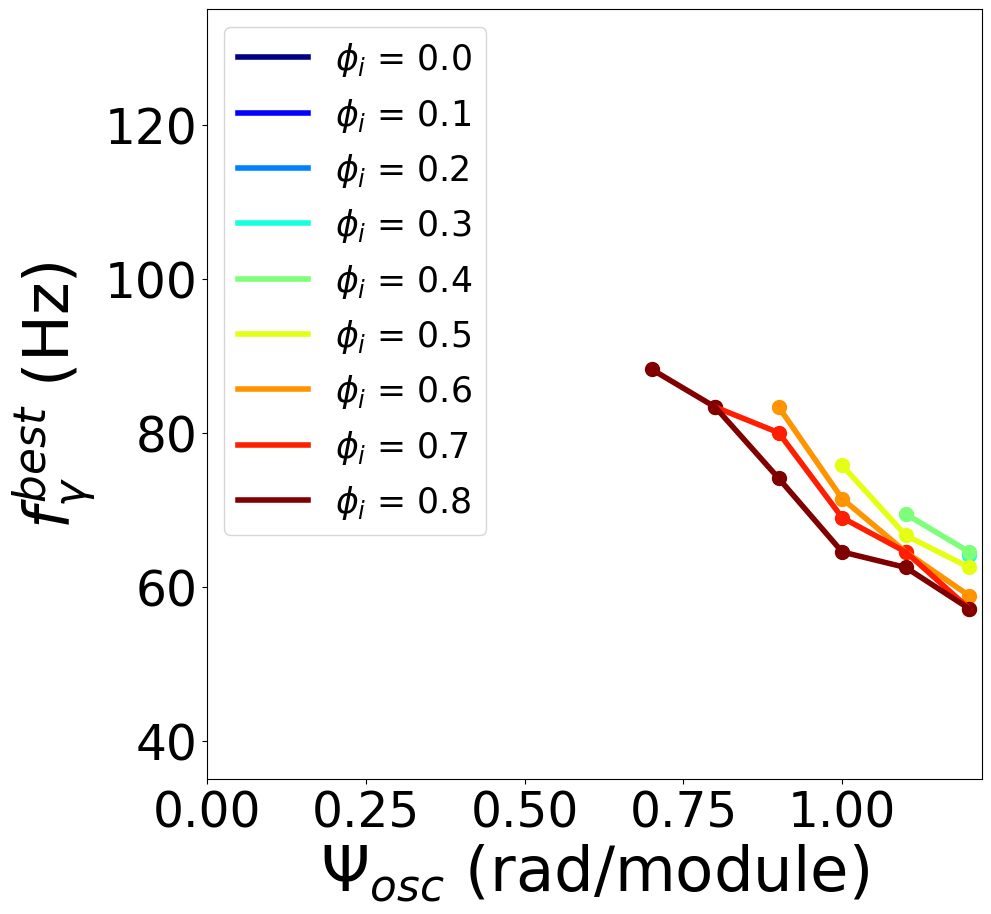

In [25]:
r = pd.read_csv('/content/drive/My Drive/Artigo Plos One/Data/Figure S2/figs2.dat', sep = '\t')
datas = []
for phi_i in r['a'].unique():
  aux = r[r['a'] == phi_i]
  datas.append(aux)


parameter = np.linspace(0,3000,31)
second_s = parameter


v_onda = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
M_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

AM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

BM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

CM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

DM_mm_matriz = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
for d_inicial in range(len(datas)):
  r = datas[d_inicial]
  mm_matriz = [[],[]] #
  Amm_matriz = [[],[]]
  Bmm_matriz = [[],[]]
  Cmm_matriz = [[],[]]
  Dmm_matriz = [[],[]]
  for data in range(len(v_onda)):
    rasterplot_data_3 = r[r['delay'] == v_onda[data]]
    making_1()

    for i in range(len(parameter)):
        making_2(med_i1a,med_i1b,med_i1c,med_i1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis)
        making_2(med_i2a,med_i2b,med_i2c,med_i2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis)
        making_2(med_i3a,med_i3b,med_i3c,med_i3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis)
        making_2(med_i4a,med_i4b,med_i4c,med_i4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis)

    nrep=1


    delayy = [1.4]
    for rep in range(1,nrep+1):
        making_3()


        for i in range(len(parameter)):
            rasterplot = rasterplot_data_3[(rasterplot_data_3['tau']== parameter[i])]
            raster_time = np.array(rasterplot['t'])
            raster_who = np.array(rasterplot['who'])


            a1t,b1t,c1t,d1t,a1q,b1q,c1q,d1q = quant_itens(raster_time, raster_who,250,370,1)
            a2t,b2t,c2t,d2t,a2q,b2q,c2q,d2q = quant_itens(raster_time, raster_who,350,500,1)

            a1t2,b1t2,c1t2,d1t2,a1q2,b1q2,c1q2,d1q2 = quant_itens(raster_time, raster_who,250,370,2)
            a2t2,b2t2,c2t2,d2t2,a2q2,b2q2,c2q2,d2q2 = quant_itens(raster_time, raster_who,350,500,2)


            a1t23,b1t23,c1t23,d1t23,a1q23,b1q23,c1q23,d1q23 = quant_itens(raster_time, raster_who,250,370,3)
            a2t23,b2t23,c2t23,d2t23,a2q23,b2q23,c2q23,d2q23 = quant_itens(raster_time, raster_who,350,500,3)

            a1t234,b1t234,c1t234,d1t234,a1q234,b1q234,c1q234,d1q234 = quant_itens(raster_time, raster_who,250,370,4)
            a2t234,b2t234,c2t234,d2t234,a2q234,b2q234,c2q234,d2q234 = quant_itens(raster_time, raster_who,350,500,4)


            making_4(a1q,   b1q,   c1q,   d1q,               item_1a,item_1b,item_1c,item_1d,i1a_statis,i1b_statis,i1c_statis,i1d_statis,i)
            making_4(a1q2,  b1q2,  c1q2,  d1q2,           item_2a,item_2b,item_2c,item_2d,i2a_statis,i2b_statis,i2c_statis,i2d_statis,i)
            making_4(a1q23, b1q23, c1q23, d1q23,       item_3a,item_3b,item_3c,item_3d,i3a_statis,i3b_statis,i3c_statis,i3d_statis,i)
            making_4(a1q234,b1q234,c1q234,d1q234,   item_4a,item_4b,item_4c,item_4d,i4a_statis,i4b_statis,i4c_statis,i4d_statis,i)

        making_5(med_i1a,med_i1b,med_i1c,med_i1d,item_1a,item_1b,item_1c,item_1d, parameter)
        making_5(med_i2a,med_i2b,med_i2c,med_i2d,item_2a,item_2b,item_2c,item_2d, parameter)
        making_5(med_i3a,med_i3b,med_i3c,med_i3d,item_3a,item_3b,item_3c,item_3d, parameter)
        making_5(med_i4a,med_i4b,med_i4c,med_i4d,item_4a,item_4b,item_4c,item_4d, parameter)

    making_6(med_i1a, med_i1b, med_i1c, med_i1d, parameter, nrep)
    making_6(med_i2a, med_i2b, med_i2c, med_i2d, parameter, nrep)
    making_6(med_i3a, med_i3b, med_i3c, med_i3d, parameter, nrep)
    making_6(med_i4a, med_i4b, med_i4c, med_i4d, parameter, nrep)

    for ii in range(len(med_i1a)):
      #mm_matriz[0].append(data)
      if((med_i1a[ii] > med_i1b[ii]) & (med_i1a[ii] > med_i1c[ii]) &(med_i1a[ii] > med_i1d[ii])):
        if((med_i2b[ii] > med_i2a[ii]) & (med_i2b[ii] > med_i2c[ii]) & (med_i2b[ii] > med_i2d[ii])):
          if((med_i3c[ii] > med_i3b[ii]) & (med_i3a[ii] < med_i3c[ii]) & (med_i3c[ii] > med_i3d[ii])):
            if((med_i4d[ii] > med_i4b[ii]) & (med_i4d[ii] > med_i4c[ii]) & (med_i4a[ii] < med_i4d[ii])):
              #if((med_i1a[ii] >= 25*0.7) & (med_i2b[ii] >= 25*0.7) & (med_i3c[ii] >= 25*0.7) & (med_i4d[ii] >= 25*0.7)):
              #print(data,ii*0.5)
              mm_matriz[0].append(data)
              mm_matriz[1].append(ii*0.5*2)#what is 0.5?
            #else:
              #mm_matriz[1].append(0)

      if((med_i1a[ii] > med_i1b[ii]) & (med_i1a[ii] > med_i1c[ii]) &(med_i1a[ii] > med_i1d[ii])):
        Amm_matriz[1].append(ii*0.5*2)
        Amm_matriz[0].append(data)
      if((med_i2b[ii] > med_i2a[ii]) & (med_i2b[ii] > med_i2c[ii]) & (med_i2b[ii] > med_i2d[ii])):
        Bmm_matriz[1].append(ii*0.5*2)
        Bmm_matriz[0].append(data)
      if((med_i3c[ii] > med_i3b[ii]) & (med_i3a[ii] < med_i3c[ii]) & (med_i3c[ii] > med_i3d[ii])):
        Cmm_matriz[1].append(ii*0.5*2)
        Cmm_matriz[0].append(data)
      if((med_i4d[ii] > med_i4b[ii]) & (med_i4d[ii] > med_i4c[ii]) & (med_i4a[ii] < med_i4d[ii])):
        Dmm_matriz[1].append(ii*0.5*2)
        Dmm_matriz[0].append(data)

    M_mm_matriz[d_inicial] = mm_matriz

    AM_mm_matriz[d_inicial] = Amm_matriz

    BM_mm_matriz[d_inicial] = Bmm_matriz

    CM_mm_matriz[d_inicial] = Cmm_matriz

    DM_mm_matriz[d_inicial] = Dmm_matriz


####


MM=[]
MMA=[]
MMB=[]
MMC=[]
MMD=[]
for k in range(len(datas)):
  MM_conjunto = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoA = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoB = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoC = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
  MM_conjuntoD = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

  mm_matriz = M_mm_matriz[k]
  for i in range(len(mm_matriz[0])):
    for y in range(len(v_onda)):
      if (mm_matriz[0][i]== y):
        MM_conjunto[y].append(mm_matriz[1][i])

  MM.append(MM_conjunto)

  Amm_matriz = AM_mm_matriz[k]
  for i in range(len(Amm_matriz[0])):
    for y in range(len(v_onda)):
      if (Amm_matriz[0][i]== y):
        MM_conjuntoA[y].append(Amm_matriz[1][i])

  MMA.append(MM_conjuntoA)


  Bmm_matriz = BM_mm_matriz[k]
  for i in range(len(Bmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Bmm_matriz[0][i]== y):
        MM_conjuntoB[y].append(Bmm_matriz[1][i])

  MMB.append(MM_conjuntoB)


  Cmm_matriz = CM_mm_matriz[k]
  for i in range(len(Cmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Cmm_matriz[0][i]== y):
        MM_conjuntoC[y].append(Cmm_matriz[1][i])

  MMC.append(MM_conjuntoC)


  Dmm_matriz = DM_mm_matriz[k]
  for i in range(len(Dmm_matriz[0])):
    for y in range(len(v_onda)):
      if (Dmm_matriz[0][i]== y):
        MM_conjuntoD[y].append(Dmm_matriz[1][i])

  MMD.append(MM_conjuntoD)


######

plt.figure(figsize = (10,10))


jet = cm.get_cmap('jet')
jet_9_colors = jet(np.linspace(0, 1, 9))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

plt.ylim([35,135])
plt.xlim([0.0,1.22])
plt.ylabel(r"$f_{\gamma}^{best}$ (Hz)",fontsize = 45)
plt.xlabel(r"$\Psi_{osc}$ (rad/module)", fontsize = 45)
colors= ['k','g','b','y','orange','lime','r','grey','pink']
tt=[]
xxx = []
yyy = []
for k in range(len(datas)):
  t=[]
  zz=[]
  MM_conjunto = MM[k]
  for z in range(len(MM_conjunto)):
    t.append(np.mean(MM_conjunto[z]))
    zz.append(z)
    plt.scatter((z*0.1),1000/np.mean(MM_conjunto[z]),c = jet_9_colors[k], s = 100)
    #print(MM_conjunto[z])
  kk= k/10
  plt.plot(np.array(zz)*0.1,1000/(np.array(t)), c= jet_9_colors[k], label = r'$\phi_i$ = %.1f' % (kk), lw = 4)
  xxx.append(np.array(zz)*0.1)
  yyy.append(1000/np.array(t))
  plt.legend(fontsize = 25)
  tt.append(t)
plt.tick_params(labelsize = 35)
#plt.savefig('111.png',bbox_inches='tight')
plt.show()





<Figure size 10000x10000 with 0 Axes>

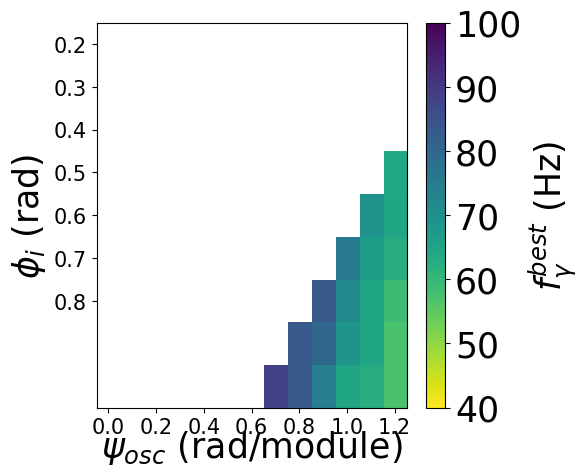

In [26]:
plt.figure(figsize = (100,100))
a=np.array(tt)
fig, ax = plt.subplots(1,1, figsize = (5,5))



cax = ax.imshow(1000/a[:], aspect='auto', vmin = 40,vmax=100, cmap = 'viridis_r')
plt.xticks([0,2,4,6,8,10,12], labels= [0.0,0.2,0.4,0.6,0.8,1.0,1.2])
plt.yticks([0,1,2,3,4,5,6], labels= [0.2,0.3,0.4,0.5,0.6,0.7,0.8])
#ax.set_xlabel(r"$\theta$ speed (rad/module)",fontsize = 35)
ax.set_title(r"$\psi_{osc}$ (rad/module)",fontsize = 25,y=-0.15)
plt.xticks(rotation=0)
plt.ylabel(r"$\phi_i$ (rad)", fontsize =25)
plt.tick_params(labelsize= 15)
cbar = fig.colorbar(cax, ticks=[40,50,60,70,80,90,100],orientation='vertical')
cbar.set_label(label=r"$f_\gamma^{best}$ (Hz)",size=25)
cbar.ax.tick_params(labelsize=25)
cbar.ax.invert_xaxis()

plt.subplots_adjust(top=0.88)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
#plt.savefig('222.png',bbox_inches='tight')

# Figure S3
Shows an ilustrative matix of the netowrk connections

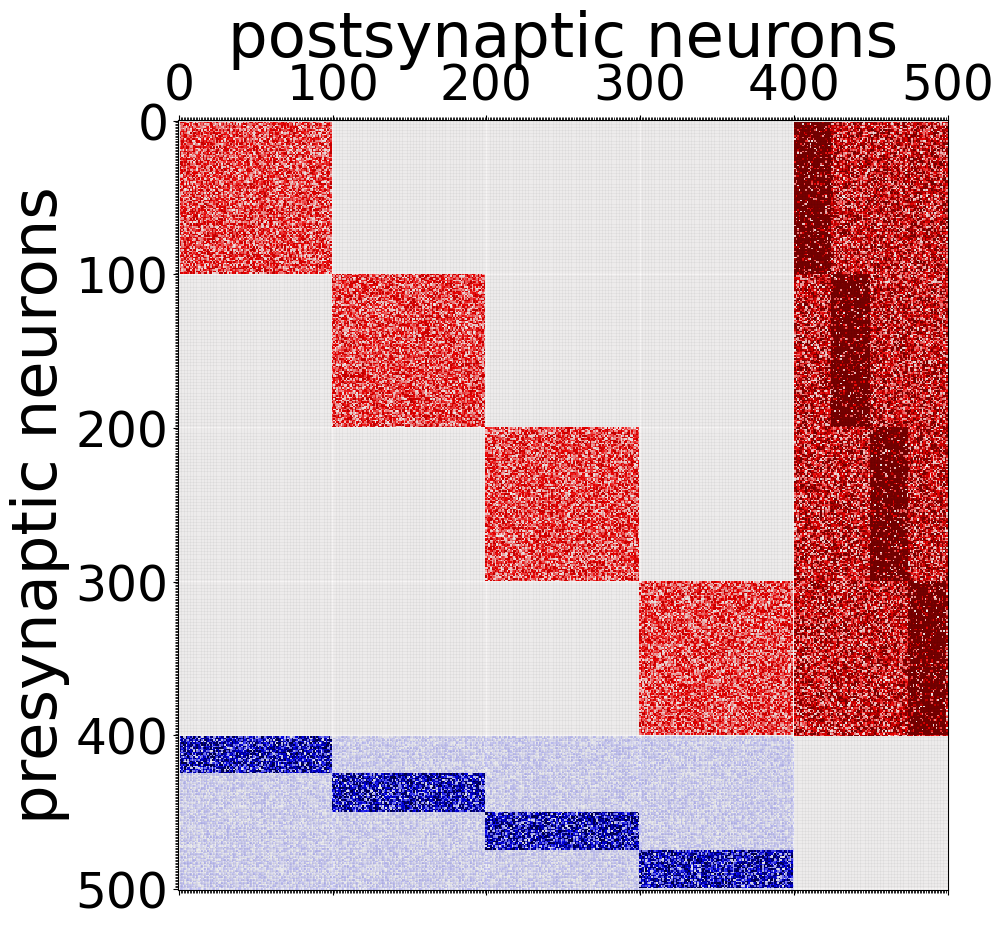

In [27]:
pesos = pd.read_csv("/content/drive/My Drive/Artigo Plos One/Data/Figure S3/figs3.dat", sep= '\t')


n1 = np.array(pesos['n1'])
n2 = np.array(pesos['n2'])
n_peso = np.array(pesos['peso'])

m =  np.column_stack((n1,n2, n_peso))
MM = np.zeros(shape = [501,501])

for i in range(len(n1)-1):
    a= int(m[i][0])
    b=int(m[i][1])
    c = m[i][2]
    MM[a][b] = c

fig, ax = plt.subplots(figsize=(10,10))


ax.matshow(MM.T, cmap='seismic', vmin = -1, vmax = 1)
ax.set_xticks([0,100,200,300,400,500])
ax.set_yticks([0,100,200,300,400,500])
minor_ticks = np.arange(0, 500, 1)
ax.set_ylabel("presynaptic neurons", fontsize = 45)
ax.set_xlabel("postsynaptic neurons", fontsize = 45)
ax.xaxis.set_label_position('top')
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.tick_params(labelsize = 35)
ax.grid(which = 'minor',color='k', linestyle='-', linewidth=0.05)


#plt.savefig('MATRIX.png',bbox_inches = "tight")
